# 4 ANALISIS E INSIGHTS

# 1.1 Set Up

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import numpy as np

import seaborn as sns
%config IPCompleter.greedy = True

pd.options.display.float_format = '{:15.2f}'.format

sns.set_style('darkgrid')

# 1.2 Carga de Datos

In [52]:
df = pd.read_csv('..//Datos/df_desarrollo.csv')
df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)
df_dia = pd.read_csv('..//Datos/df_dia.csv')

In [53]:
df.head(2)

planta  mes  dia  hora  minuto        sensor_id     irradiacion  \
fecha                                                                        
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   

                t_ambiente        t_modulo      inverter_id           kw_dc  \
fecha                                                                         
2020-05-15           25.18           22.86  1BY6WEcLGh8j5v7            0.00   
2020-05-15           25.18           22.86  1IF53ai7Xc0U56Y            0.00   

                     kw_ac      eficiencia          kw_dia        kw_total  
fecha                                                                       
2020-05-15            0.00            0.00            0.00      6259559.00  
2020-05-15            0.00            0.00            0.00      6183645.00

In [54]:
df_dia.head(2)

fecha planta      inverter_id  irradiacion_min  irradiacion_mean  \
0  2020-05-15     p1  1BY6WEcLGh8j5v7             0.00              0.20   
1  2020-05-16     p1  1BY6WEcLGh8j5v7             0.00              0.21   

   irradiacion_max  t_ambiente_min  t_ambiente_mean  t_ambiente_max  \
0             0.89           22.04            27.43           34.43   
1             0.81           21.50            26.78           32.52   

     t_modulo_min  ...       kw_dc_sum       kw_ac_min      kw_ac_mean  \
0           20.29  ...       235340.70            0.00          247.81   
1           19.59  ...       256629.88            0.00          285.51   

        kw_ac_max       kw_ac_sum  eficiencia_min  eficiencia_mean  \
0         1039.35        23046.55            0.00             5.26   
1         1095.29        25124.49            0.00             5.56   

   eficiencia_max      kw_dia_max    kw_total_max  
0            9.82         5754.00      6265313.00  
1            9.83         6292.00      6271605.00  

[2 rows x 25 columns]

# 1.3 Analisis e Insights

## 1.3.1 Recepcion de Energia: Irradiacion, Temperatura Ambiente y Modulo

La recepcion de energia tiene 3 palancas:

* Irradicion.

* Temperatura Ambiente.

* Temperatura Modulo.

Como cada planta tiene un sensor podemos seleccionar un inverter en cada planta para reducir nuestro dataframe.

* <u>Preguntas Semilla Irradiacion</U>

    - ¿Cual es la irradiacion diaria (media,max,min)?
    
    - ¿Que irradiacion hay en cada planta?. ¿La irradicion que hay en ambas plantas es similar?.
    
    - ¿Como se distribuye la irradiacion a lo largo del dia?. 
    
    - ¿Es constante a lo largo de los dias? .¿Es constante en ambas plantas?. ¿Hay relacion entre irradiacion de ambas plantas?.
    
    - ¿Como se relaciona la temperatura ambiente y la temperatura del modulo?.

In [55]:
df.head(50)

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:30:00     p1    5   15     0      30  HmiyD2TTLFNqkNe   
2020-05-15 00:30:00     p1    5   15     0      30  HmiyD2TTLFNqkNe   
2020-05-15 00:30:00     p1    5   15     0      30  HmiyD2TTLFNqkNe   
2020-05-15 00:30:00     p1    5   15     0      30  HmiyD2TTLFNqkNe   
2020-05-15 00:30:00     p1    5   15     0      30  HmiyD2TTLFNqkNe   
2020-05-15 00:30:00     p1    5   15     0      30  HmiyD2TTLFNqkNe   
2020-05-15 00:30:00     p1    5   15     0      30  HmiyD2TTLFNqkNe   
2020-05-15 00:30:00     p1    5   15     0      30  HmiyD2TTLFNqkNe   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00        

In [56]:
recepcion = df.loc[(df.inverter_id == '1BY6WEcLGh8j5v7') | (df.inverter_id == 'q49J1IKaHRwDQnt'), 'planta':'t_modulo']
recepcion

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:30:00     p1    5   15     0      30  HmiyD2TTLFNqkNe   
2020-05-15 00:45:00     p1    5   15     0      45  HmiyD2TTLFNqkNe   
2020-05-15 01:00:00     p1    5   15     1       0  HmiyD2TTLFNqkNe   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 22:45:00     p2    6   17    22      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:00:00     p2    6   17    23       0  iq8k7ZNt4Mwm3w0   
2020-06-17 23:15:00     p2    6   17    23      15  iq8k7ZNt4Mwm3w0   
2020-06-17 23:30:00     p2    6   17    23      30  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  
fecha                                                                
2020-05-15 00:00:00            0.00           25.18           22.86  
2020-05-15 00:15:00            0.00           25.08           22.76  
2020-05-15 00:30:00            0.00           24.94           22.59  
2020-05-15 00:45:00            0.00           24.85           22.36  
2020-05-15 01:00:00            0.00           24.62           22.17  
...                             ...             ...             ...  
2020-06-17 22:45:00            0.00           23.51           22.86  
2020-06-17 23:00:00            0.00           23.48           22.74  
2020-06-17 23:15:00            0.00           23.35           22.49  
2020-06-17 23:30:00            0.00           23.29           22.37  
2020-06-17 23:45:00            0.00           23.20           22.54  

[6413 rows x 9 columns]

In [57]:
temp = recepcion.groupby('planta').agg({'irradiacion':'sum','t_ambiente':'mean','t_modulo':'mean'})
temp

irradiacion      t_ambiente        t_modulo
planta                                                
p1              726.40           25.56           31.18
p2              758.49           28.07           32.77

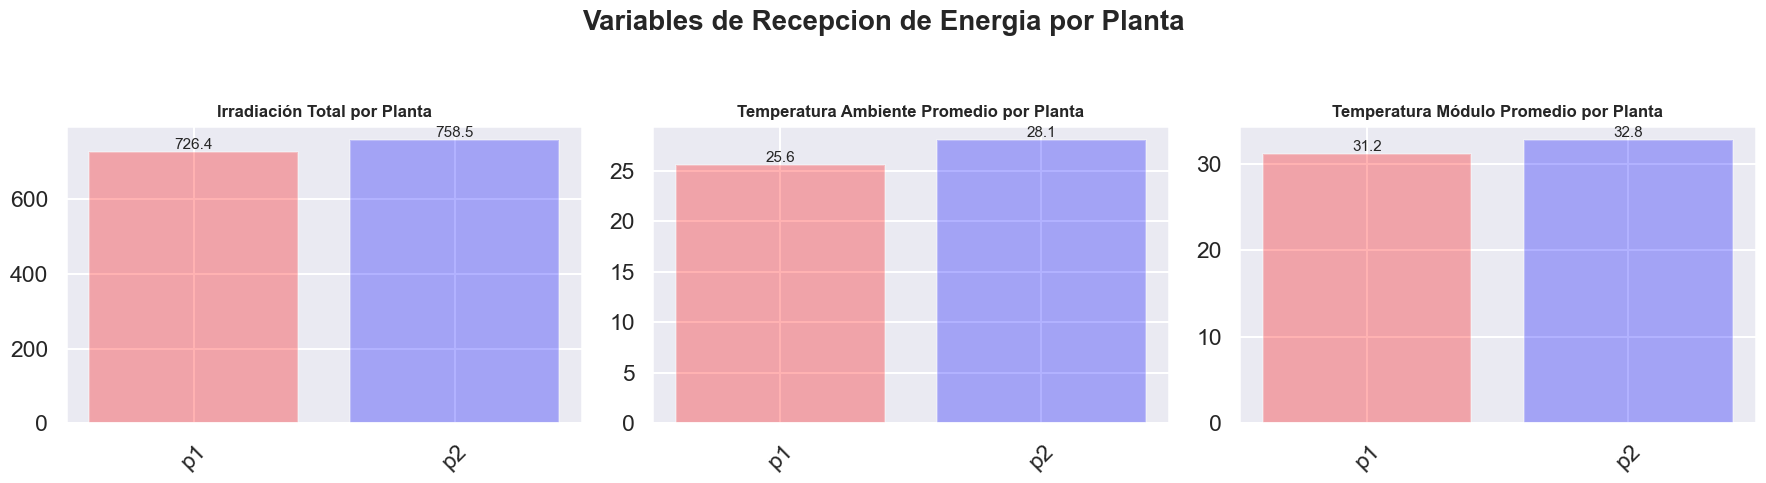

In [58]:
# Crear la figura y los ejes
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Títulos de los subgráficos
titulos = [
    "Irradiación Total por Planta",
    "Temperatura Ambiente Promedio por Planta",
    "Temperatura Módulo Promedio por Planta"
]

# Columnas correspondientes a cada gráfico
columnas = ['irradiacion', 't_ambiente', 't_modulo']

# Colores para las barras
colores = ['red', 'blue']

# Iterar sobre cada eje para crear los gráficos de barras
for i in range(3):
    # Crear el gráfico de barras
    barras = ax[i].bar(temp.index, temp[columnas[i]], color=colores, alpha=0.3)

    # Establecer el título
    ax[i].set_title(titulos[i], fontsize=12, fontweight='bold')

    # Rotar las etiquetas del eje X si son largas
    ax[i].tick_params(axis='x', rotation=45)

    # Añadir etiquetas de valor encima de las barras
    for barra in barras:
        altura = barra.get_height()
        ax[i].text(barra.get_x() + barra.get_width() / 2, altura,
                   f'{altura:.1f}', ha='center', va='bottom', fontsize=11)

# Título general de la figura
f.suptitle('Variables de Recepcion de Energia por Planta', fontsize=20, fontweight='bold')

# Ajustar el diseño para que no se solapen los elementos
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar el gráfico
plt.show()


**<u>Conclusiones</u>**

* La planta 2 recoge una cantidad sensiblemente mayor de energia.

* **Por tanto no deberia haber diferencias significativas en la generacion como consecuencia de la recepcion de energia.**

In [59]:
temp = recepcion.loc[:,['irradiacion','t_ambiente','t_modulo']]
temp.corr()

irradiacion      t_ambiente        t_modulo
irradiacion            1.00            0.65            0.95
t_ambiente             0.65            1.00            0.82
t_modulo               0.95            0.82            1.00

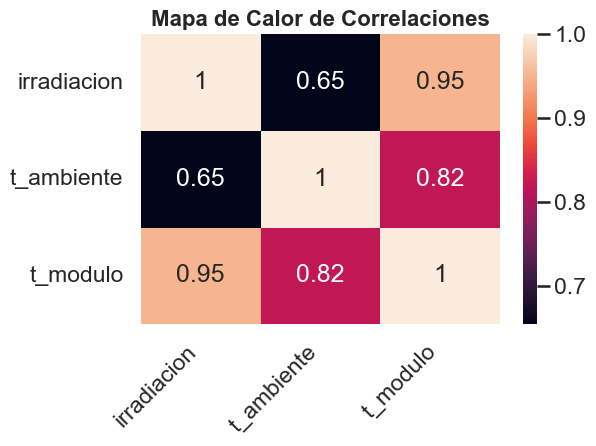

In [60]:
sns.heatmap(temp.corr(), annot = True)
# Agregar título y ajustar etiquetas
plt.title("Mapa de Calor de Correlaciones", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**<u>Conclusiones</u>**

* La irradiacion tiene la correlacion mas alta con la temperatura del modulo, 0.95.

* La irradiacion tiene menor correlacion con la temperatura ambiente 0.65.

* La irradiacion va a ser nuestra variable principal. Los modulos que generen poco DC con irradiacion alta, podemos afirmar que tienen algun   problema: averia, mal mantenimiento, suciedad etc.



El siguiente paso es conocer la distribucion de la irradiacion a lo largo del dia, y esta con la temperatura ambiente para detectar posibles lags existentes.

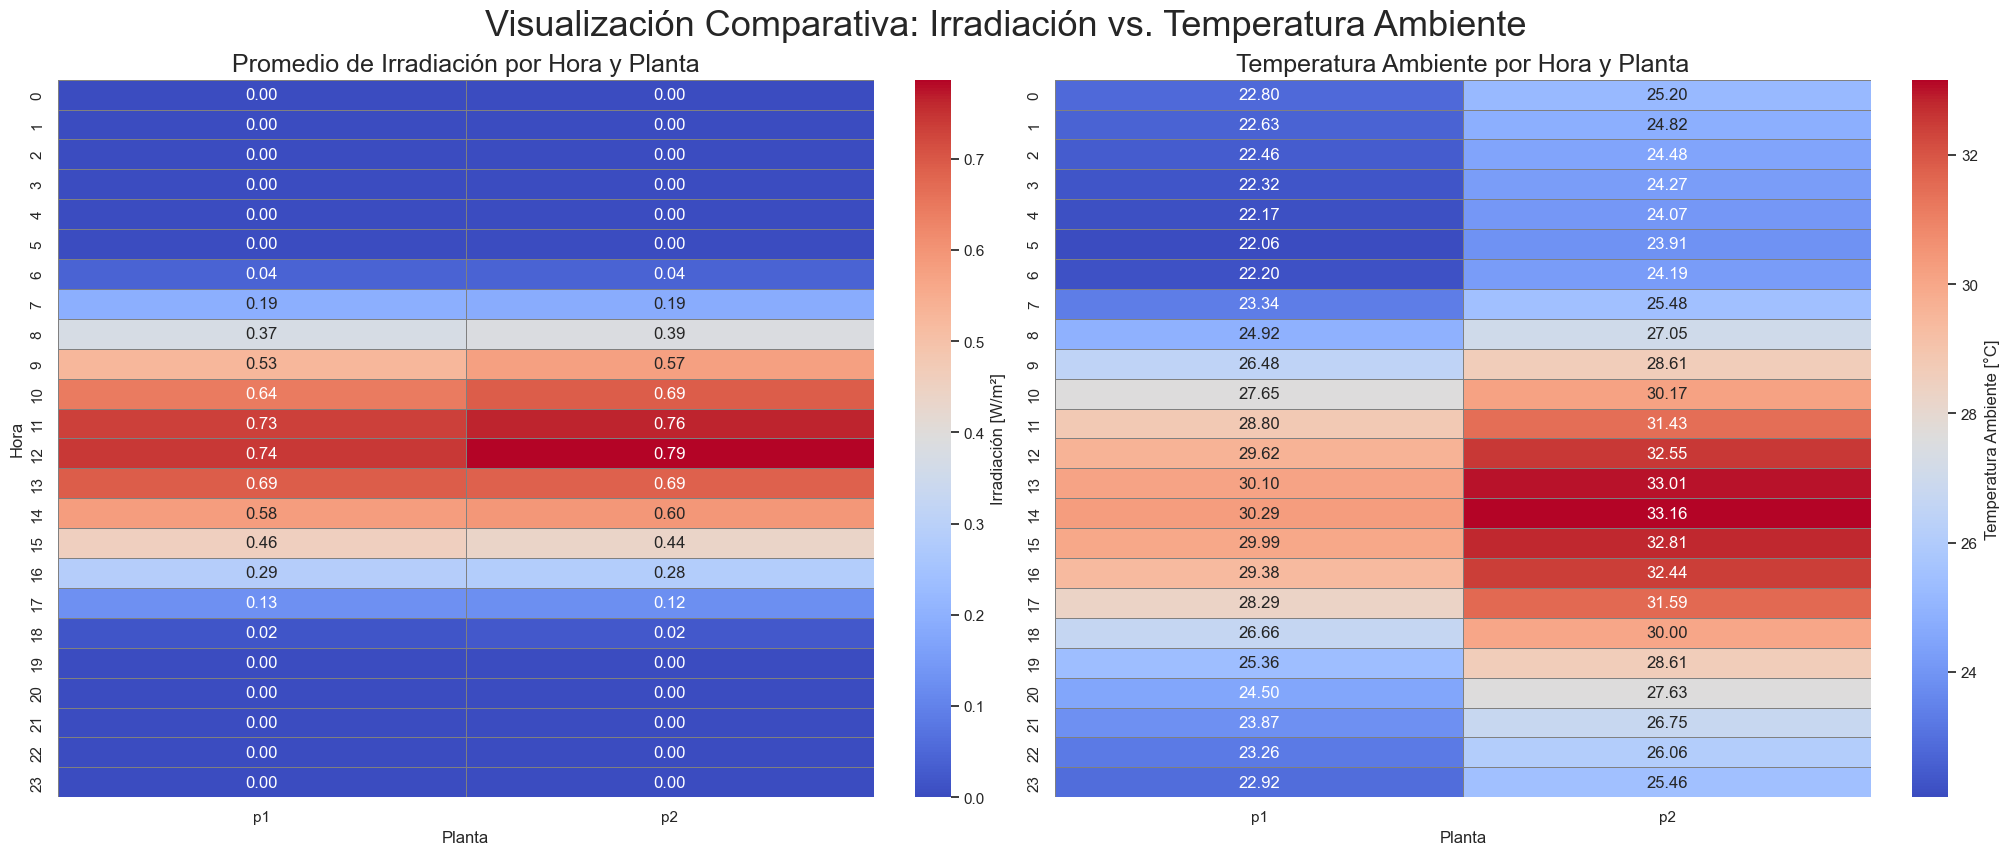

In [61]:
# Preparar los datos
heatmap1 = pd.crosstab( recepcion.hora, recepcion.planta, values=recepcion.irradiacion, aggfunc='mean')
heatmap2 = pd.crosstab( recepcion.hora, recepcion.planta, values=recepcion.t_ambiente, aggfunc='mean')

# Estilo seaborn
sns.set(style="whitegrid")

# Crear el grid de 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(20, 8), constrained_layout=True)

# Heatmap de Irradiación
sns.heatmap( heatmap1, ax=axes[0], annot=True, fmt=".2f", cmap="coolwarm",
    linewidths=0.5, linecolor='gray',cbar_kws={'label': 'Irradiación [W/m²]'})

axes[0].set_title("Promedio de Irradiación por Hora y Planta", fontsize=18)
axes[0].set_xlabel("Planta")
axes[0].set_ylabel("Hora")

# Heatmap de Temperatura Ambiente
sns.heatmap(
    heatmap2, ax=axes[1], annot=True, fmt=".2f", cmap="coolwarm",
    linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Temperatura Ambiente [°C]'})
axes[1].set_title("Temperatura Ambiente por Hora y Planta", fontsize=18)
axes[1].set_xlabel("Planta")
axes[1].set_ylabel("")

# Mostrar el resultado
plt.suptitle("Visualización Comparativa: Irradiación vs. Temperatura Ambiente", fontsize=26, y=1.05)
plt.show()

**<U>Conclusiones</U>**

- **<U>Grafico Irradiacion</U>**

        * El intervalo de radiacion efectiva se produce entre las 9 am y las 15 pm.

        * El maximo de irradiacion se prodice entre las 11 y 12 am, siendo el pico sensiblemente mas alto en la planta 2.
        Esto indica que no hay una separacion muy grande entre ambas plantas.

  

- **<U>Grafico Temperatura Ambiente</U>**

        * Existe un lag de aproximadamente una hora entre el irradiacion y aumento de la temperatura ambiente.

        Es normal, se esta haciendo de dia y por ello la temperatura aumenta progresivamente.

        * El maximo de temperatura entre plantas se produce dos horas despues del maximo de irradiadion a las 14 hora en ambas plantas.
         Este maximos de temperatura es es 3ºC mayor en la planta 2.

**Las 2 plantas estan recibiendo suficiente irradiacion para producir DC.**

A continuacion vamos a ver la relacion irradiacion produccion de DC mediante scatterplot.

## 1.3.2 Generacion de DC

* <U> Preguntas semillas Generacion de DC</U>


    - ¿Cual es la relacion entre irradiacion y generacion de DC?.
 
    - ¿Como se ve afectada la generacion de DC por la temperatura ambiente o del modulo?.
 
    - ¿La generacion de DC es similar entre ambas plantas?.
 
    - ¿ Como se distribuye la generacion de DC a lo largo del dia?.
 
    - ¿Esta distribucion es constante a lo largo de los dias?.
 
    - ¿Es constante a traves de todos los inverters?.
 
    - ¿Hay picos de generacion, son constantes, se producen en ambas plantas, hay relacion entre ambas plantas?.
 
    - ¿Hay fallos o averias en los inverters?¿Cada cuanto tiempo se producen?.

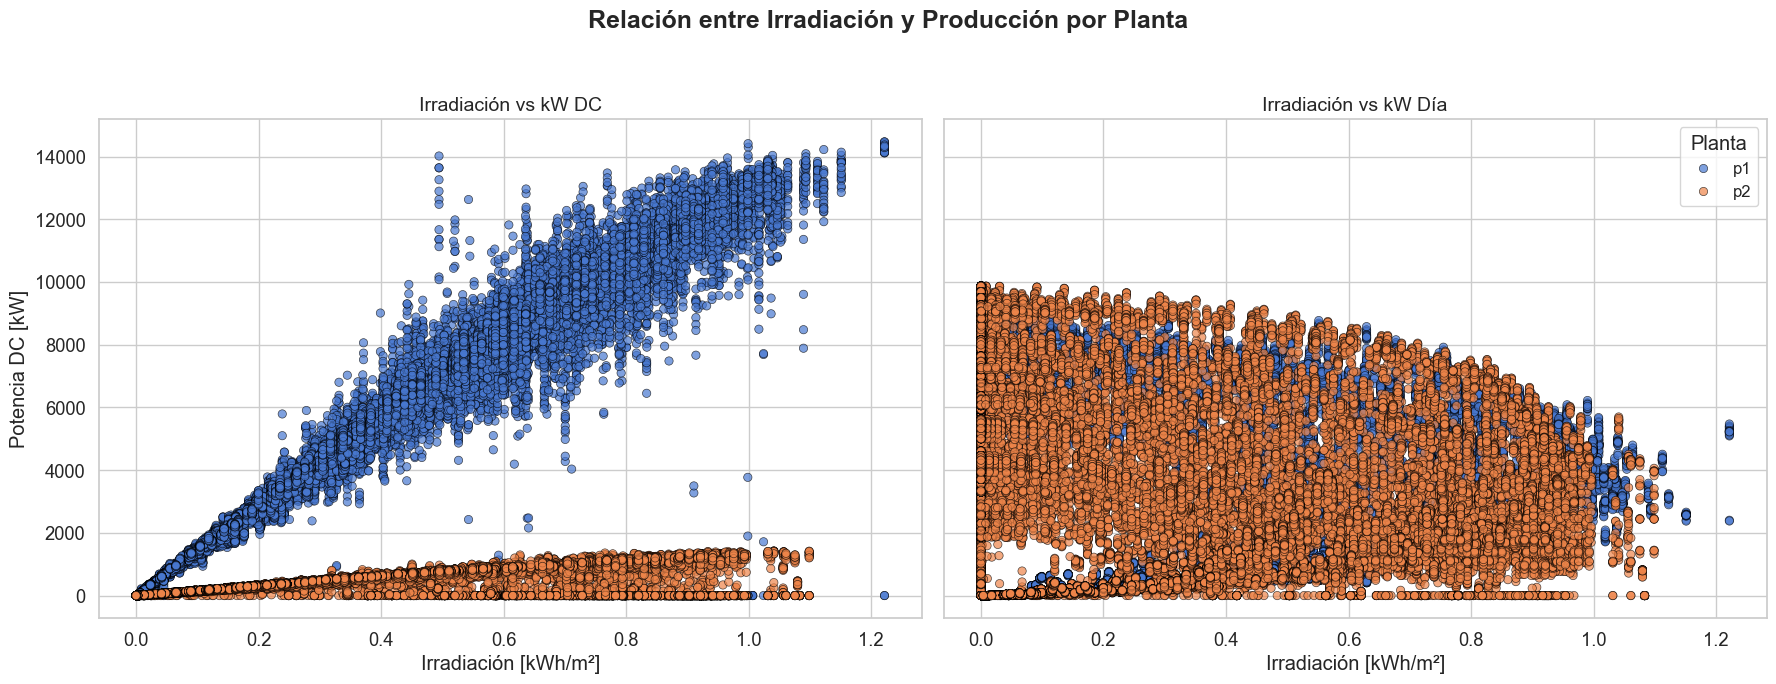

In [62]:
# Estilo general
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Crear figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharex=True, sharey=True)

# Primer gráfico: irradiación vs kW DC
sns.scatterplot( data=df, x="irradiacion", y="kw_dc", hue="planta", ax=axes[0], edgecolor='black', alpha=0.7,legend=False)

axes[0].set_title("Irradiación vs kW DC", fontsize=14)
axes[0].set_xlabel("Irradiación [kWh/m²]")
axes[0].set_ylabel("Potencia DC [kW]")

# Segundo gráfico: irradiación vs kW Día
scatter = sns.scatterplot( data=df, x="irradiacion", y="kw_dia", hue="planta", ax=axes[1], edgecolor='black', alpha=0.7 )

axes[1].set_title("Irradiación vs kW Día", fontsize=14)
axes[1].set_xlabel("Irradiación [kWh/m²]")
axes[1].set_ylabel("Potencia Diaria [kW]")

# Leyenda dentro del segundo gráfico
axes[1].legend( title="Planta", loc="upper right", frameon=True, fontsize='small', title_fontsize='medium')

# Título general para el grid
fig.suptitle("Relación entre Irradiación y Producción por Planta", fontsize=18, weight='bold')

# Ajustes finales
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


**<U>CONCLUSIONES:</u>**

* Hay una clara relacion lineal entre irradiacion y generacion de DC.

* Esa relacion lineal es mas fuerte en el caso de la planta 1 que en la planta 2

* En ambas plantas a medida que aumenta la irradiacion, disminuye la generacion de Kwh.

* Esto en principio es contraintuitivo, viene motivado por el hecho de Kw_dia es un acumulado y el maximo se consigue al final del dia cuando la irradiacion , un acumulado que recoge el total del dia, logicamente es minima.

**Esto hace necesario graficar curvas de generacion de energia por hora del dia, sabiendo que es el acumulado del dia.**

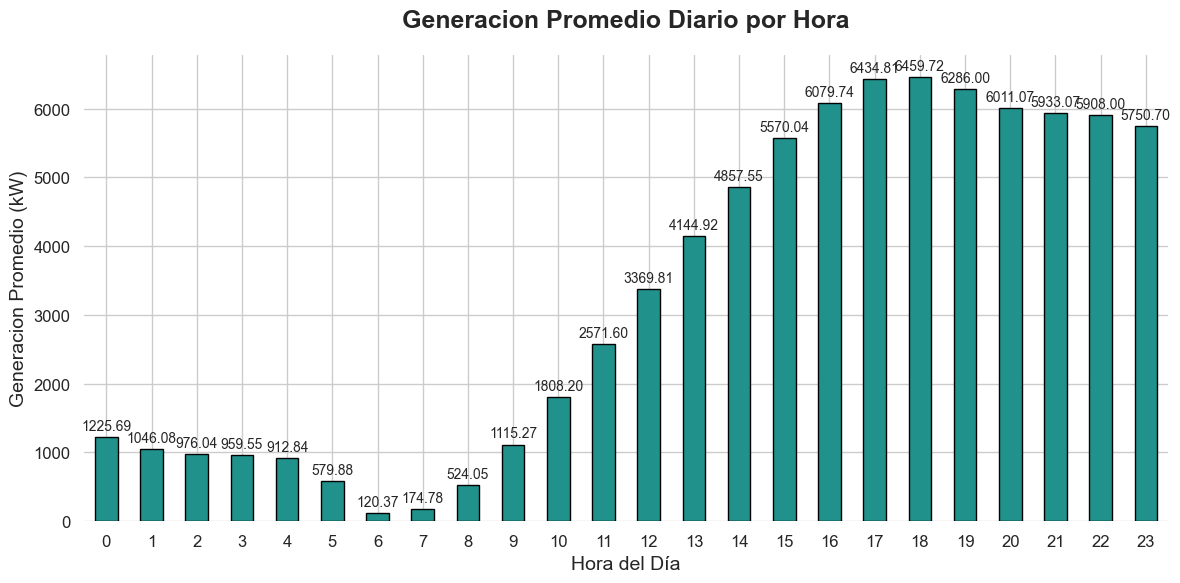

In [63]:
# Estilo general
sns.set(style="whitegrid")  

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6)) 

df.groupby('hora')[['kw_dia']].mean().plot.bar(ax=ax, color=sns.color_palette("viridis", n_colors=1), edgecolor='black', legend=False)

# Títulos y etiquetas
ax.set_title('Generacion Promedio Diario por Hora', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Hora del Día', fontsize=14)
ax.set_ylabel('Generacion Promedio (kW)', fontsize=14)

# Ajustes estéticos
ax.tick_params(axis='x', labelrotation=0, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
for spine in ax.spines.values():
    spine.set_visible(False)

# Mostrar los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**<U>Conclusiones:</U>**

* Entre las 00 y 06 am hay generacion de energia, en un momento donde no hay irradiacion.

* A partir de las 18 pm  se genera un pico y la generacion, que es un acumulado desciende lo que no tiene senrtido.

* Las variables acumulativas kw_dia y kw_total  no son confiables.

* Partiendo de esa situacion hay que asumir, por tanto, que las unicas variables confiables son la generacion de DC y de AC, con lo cual a este punto del analisis lo unico que podemos concluir indubitadamente es:

**<U>INSIGHT #1</u>**

**La Planta 2 genera niveles de DC mucho mas bajos que la Planta 1 con niveles similares de irradiacion.**

 

Nuestro dataset consta de 34 dias, asi que asumiendo que la generacion es correcta hay que pasar a estudiar como fluctua a lo largo del tiempo.

Y esto lo vamos a hacer sobre el dataset con agregacion diaria

In [64]:
df_dia

fecha planta      inverter_id  irradiacion_min  irradiacion_mean  \
0     2020-05-15     p1  1BY6WEcLGh8j5v7             0.00              0.20   
1     2020-05-16     p1  1BY6WEcLGh8j5v7             0.00              0.21   
2     2020-05-17     p1  1BY6WEcLGh8j5v7             0.00              0.24   
3     2020-05-18     p1  1BY6WEcLGh8j5v7             0.00              0.16   
4     2020-05-19     p1  1BY6WEcLGh8j5v7             0.00              0.19   
...          ...    ...              ...              ...               ...   
1491  2020-06-13     p2  xoJJ8DcxJEcupym             0.00              0.22   
1492  2020-06-14     p2  xoJJ8DcxJEcupym             0.00              0.23   
1493  2020-06-15     p2  xoJJ8DcxJEcupym             0.00              0.19   
1494  2020-06-16     p2  xoJJ8DcxJEcupym             0.00              0.17   
1495  2020-06-17     p2  xoJJ8DcxJEcupym             0.00              0.12   

      irradiacion_max  t_ambiente_min  t_ambiente_mean  t_ambiente_max  \
0                0.89           22.04            27.43           34.43   
1                0.81           21.50            26.78           32.52   
2                1.00           21.21            26.69           35.25   
3                0.97           20.96            23.85           28.37   
4                0.84           22.39            25.34           30.37   
...               ...             ...              ...             ...   
1491             0.93           22.20            26.12           31.91   
1492             0.92           23.65            27.02           32.96   
1493             0.83           24.00            26.56           31.61   
1494             0.77           23.63            26.37           30.83   
1495             0.58           22.55            24.85           29.04   

        t_modulo_min  ...       kw_dc_sum       kw_ac_min      kw_ac_mean  \
0              20.29  ...       235340.70            0.00          247.81   
1              19.59  ...       256629.88            0.00          285.51   
2              20.38  ...       288039.82            0.00          293.47   
3              19.48  ...       204030.30            0.00          208.03   
4              20.06  ...       232277.27            0.00          244.53   
...              ...  ...             ...             ...             ...   
1491           20.88  ...        27443.74            0.00          279.59   
1492           22.12  ...        30768.78            0.00          313.43   
1493           23.00  ...        25597.24            0.00          260.93   
1494           22.56  ...        22335.69            0.00          227.82   
1495           21.91  ...        17640.42            0.00          179.98   

           kw_ac_max       kw_ac_sum  eficiencia_min  eficiencia_mean  \
0            1039.35        23046.55            0.00             5.26   
1            1095.29        25124.49            0.00             5.56   
2            1114.81        28172.85            0.00             4.99   
3            1193.63        19970.51            0.00             4.99   
4            1059.80        22741.18            0.00             4.63   
...              ...             ...             ...              ...   
1491         1239.95        26840.58            0.00            51.91   
1492         1328.21        30088.97            0.00            51.94   
1493         1256.67        25049.49            0.00            52.94   
1494         1098.21        21870.63            0.00            50.90   
1495          810.77        17278.51            0.00            52.90   

      eficiencia_max      kw_dia_max    kw_total_max  
0               9.82         5754.00      6265313.00  
1               9.83         6292.00      6271605.00  
2               9.82         7045.00      6278650.00  
3               9.83         4998.00      6283648.00  
4               9.83         6449.00      6290097.00  
...              ...             ...     

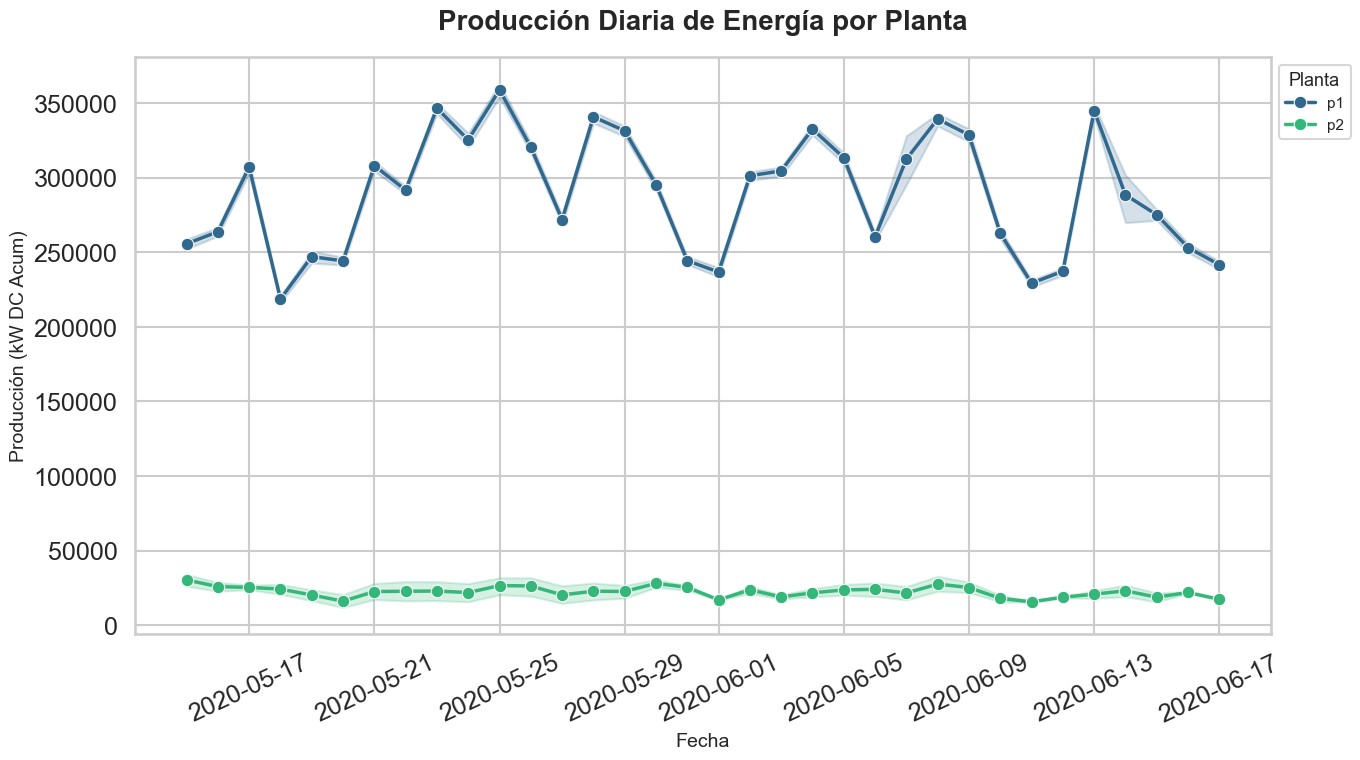

In [65]:
# Ajuste
df_dia = df_dia.copy()
df_dia['fecha'] = pd.to_datetime(df_dia['fecha'])

# Estilo general de seaborn
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.1)

# Paleta de colores elegante
palette = sns.color_palette("viridis", n_colors=df_dia['planta'].nunique())

# Crear figura
plt.figure(figsize=(14, 8))

# Graficar
sns.lineplot( data=df_dia.reset_index(), x='fecha', y='kw_dc_sum', hue='planta', palette=palette, linewidth=2.5, marker='o')

# Título y ejes
plt.title("Producción Diaria de Energía por Planta", fontsize=20, weight='bold', pad=20)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Producción (kW DC Acum)", fontsize=14)

# Formato bonito para las fechas en el eje X
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
#plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotación de etiquetas de fecha
plt.xticks(rotation=25)

# Leyenda fuera del gráfico
plt.legend(title='Planta', title_fontsize=13, fontsize=11, loc='upper left', bbox_to_anchor=(1, 1))

# Ajuste final
plt.tight_layout()
plt.show()

<u>**CONCLUSIONES</u>**

    * Hay una significativa diferencia entre la produccion de la planta 1 y la planta 2.

    * La planta 1 esta produciendo 5 veces mas energia que la 2.

    * La generacion de la planta 2 parece que es mas constante, al menos en este grafico.

    * La generacion en la planta 1 flutua unos 100.000 Kw.

Nuestro dataframe tiene 34 dias. Vamos a construir un dataframe diario por hora para cada una de las plantas

In [66]:
df['date'] = df.index.date
df

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
...                             ...             ...             ...   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 00:00:00  1BY6WEcLGh8j5v7            0.00            0.00   
2020-05-15 00:00:00  1IF53ai7Xc0U56Y            0.00            0.00   
2020-05-15 00:00:00  3PZuoBAID5Wc2HD            0.00            0.00   
2020-05-15 00:00:00  7JYdWkrLSPkdwr4            0.00            0.00   
2020-05-15 00:00:00  McdE0feGgRqW7Ca            0.00            0.00   
...                              ...             ...             ...   
2020-06-17 23:45:00  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-17 23:45:00  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-17 23:45:00  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-17 23:45:00  xMbIugepa2P7lBB            0.00            0.00   
2020-06-17 23:45:00  xoJJ8DcxJEcupym            0.00            0.00   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 00:00:00            0.00            0.00      6259559.00   
2020-05-15 00:00:00            0.00            0.00      6183645.00   
2020-05-15 00:00:00            0.00            0.00      6987759.00   
2020-05-15 00:00:00            0.00            0.00      7602960.00   
2020-05-15 00:00:00            0.00            0.00      7158964.00   
...                             ...             ...             ...   
2020-06-17 23:45:00            0.00         4157.00       520758.00   
2020-06-17 23:45:00            0.00         3931.00    121131356.00   
2020-06-17 23:45:00            0.00         4322.00      2427691.00   
2020-06-17 23:45:00            0.00         4218.00    106896394.00   
2020-06-17 23:45:00            0.00         4316.00    209335741.00   

                           date  
fecha                            
2020-05-15 00:00:00  2020-05-15  
2020-05-15 00:00:00  2020-05-15  
2020-05-15 00:00:00  2020-05-15  
2020-05-15 00:00:00  2020-05-15  
2020-05-15 00:00:00  2020-05-15  
...                         ...  
2020-06-17 23:45:00  2020-06-17  
2020-

La Curva horaria es constante en forma en la planta 1. En dias concretos los picos cambian de forma.

In [67]:
dc_constante_p1 = df[df['planta'] == 'p1'].groupby(['planta','date','hora']).kw_dc.sum()
dc_constante_p1

planta  date        hora
p1      2020-05-15  0                 0.00
                    1                 0.00
                    2                 0.00
                    3                 0.00
                    4                 0.00
                                 ...      
        2020-06-17  19                0.00
                    20                0.00
                    21                0.00
                    22                0.00
                    23                0.00
Name: kw_dc, Length: 796, dtype: float64

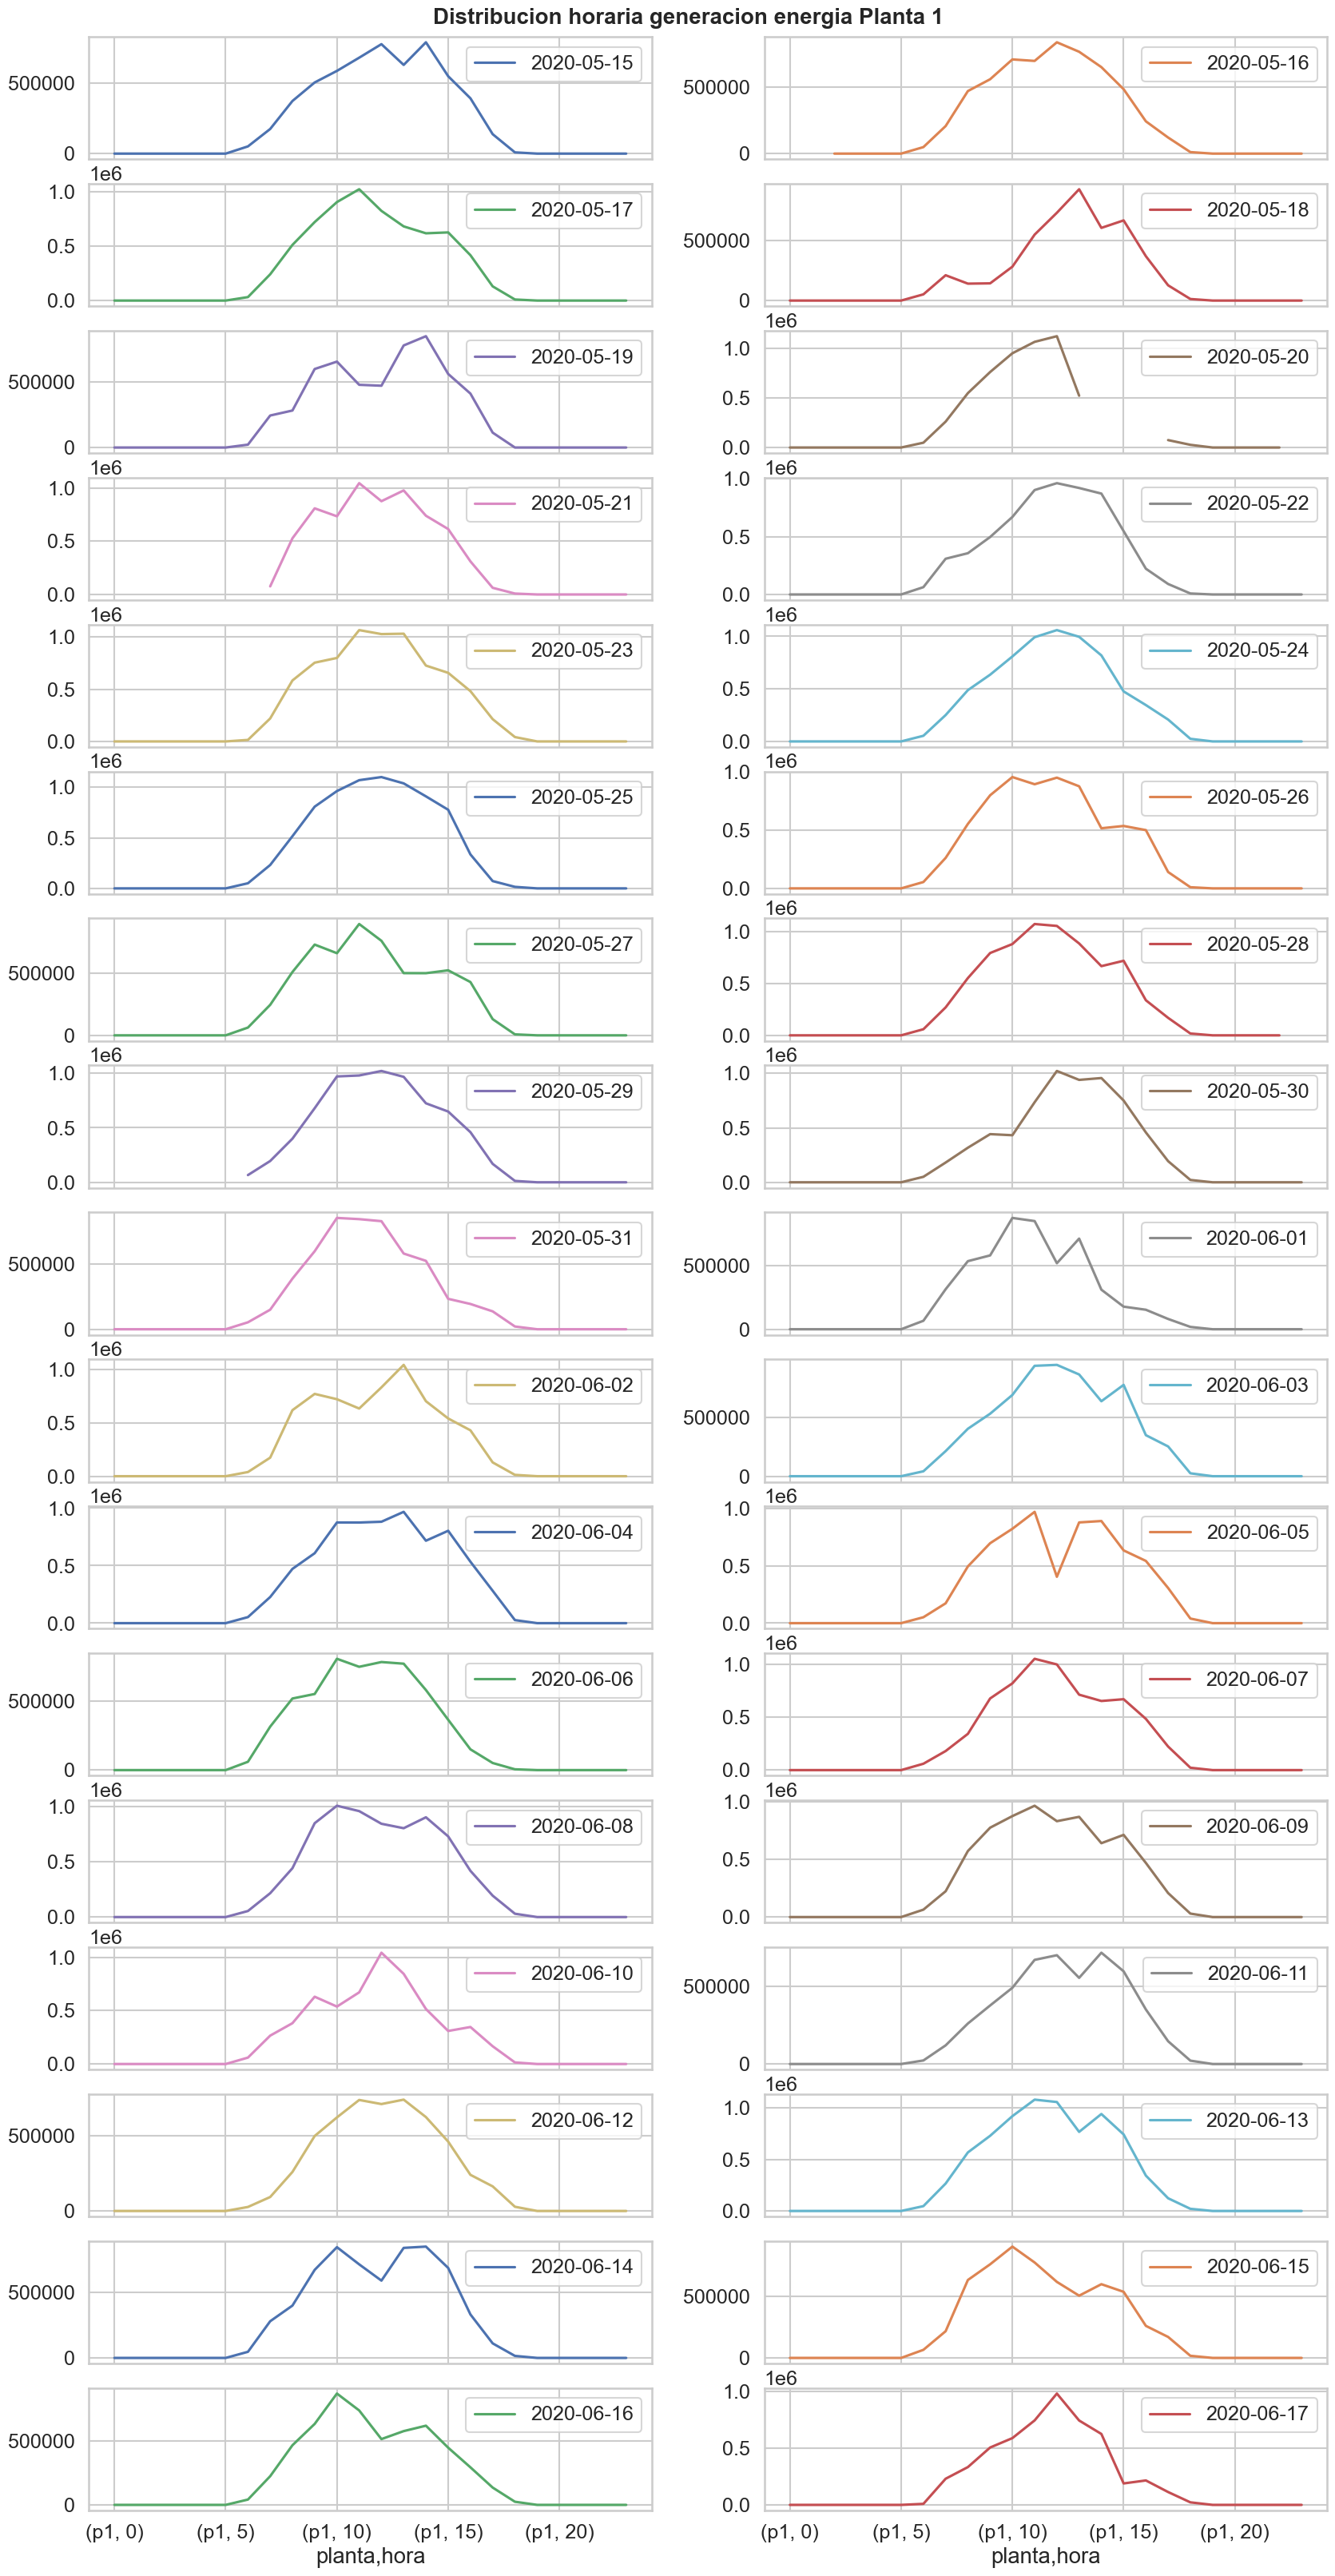

In [68]:
dc_constante_p1.unstack(level=1).plot(subplots = True, layout =(17,2), figsize=(20,36))
plt.suptitle('Distribucion horaria generacion energia Planta 1', fontsize=20, fontweight='bold')
plt.subplots_adjust(top=0.97) 
plt.show()

In [69]:
dc_constante_p2 = df[df['planta'] == 'p2'].groupby(['planta','date','hora']).kw_dc.sum()
dc_constante_p2

planta  date        hora
p2      2020-05-15  0                 0.00
                    1                 0.00
                    2                 0.00
                    3                 0.00
                    4                 0.00
                                 ...      
        2020-06-17  19                0.00
                    20                0.00
                    21                0.00
                    22                0.00
                    23                0.00
Name: kw_dc, Length: 816, dtype: float64

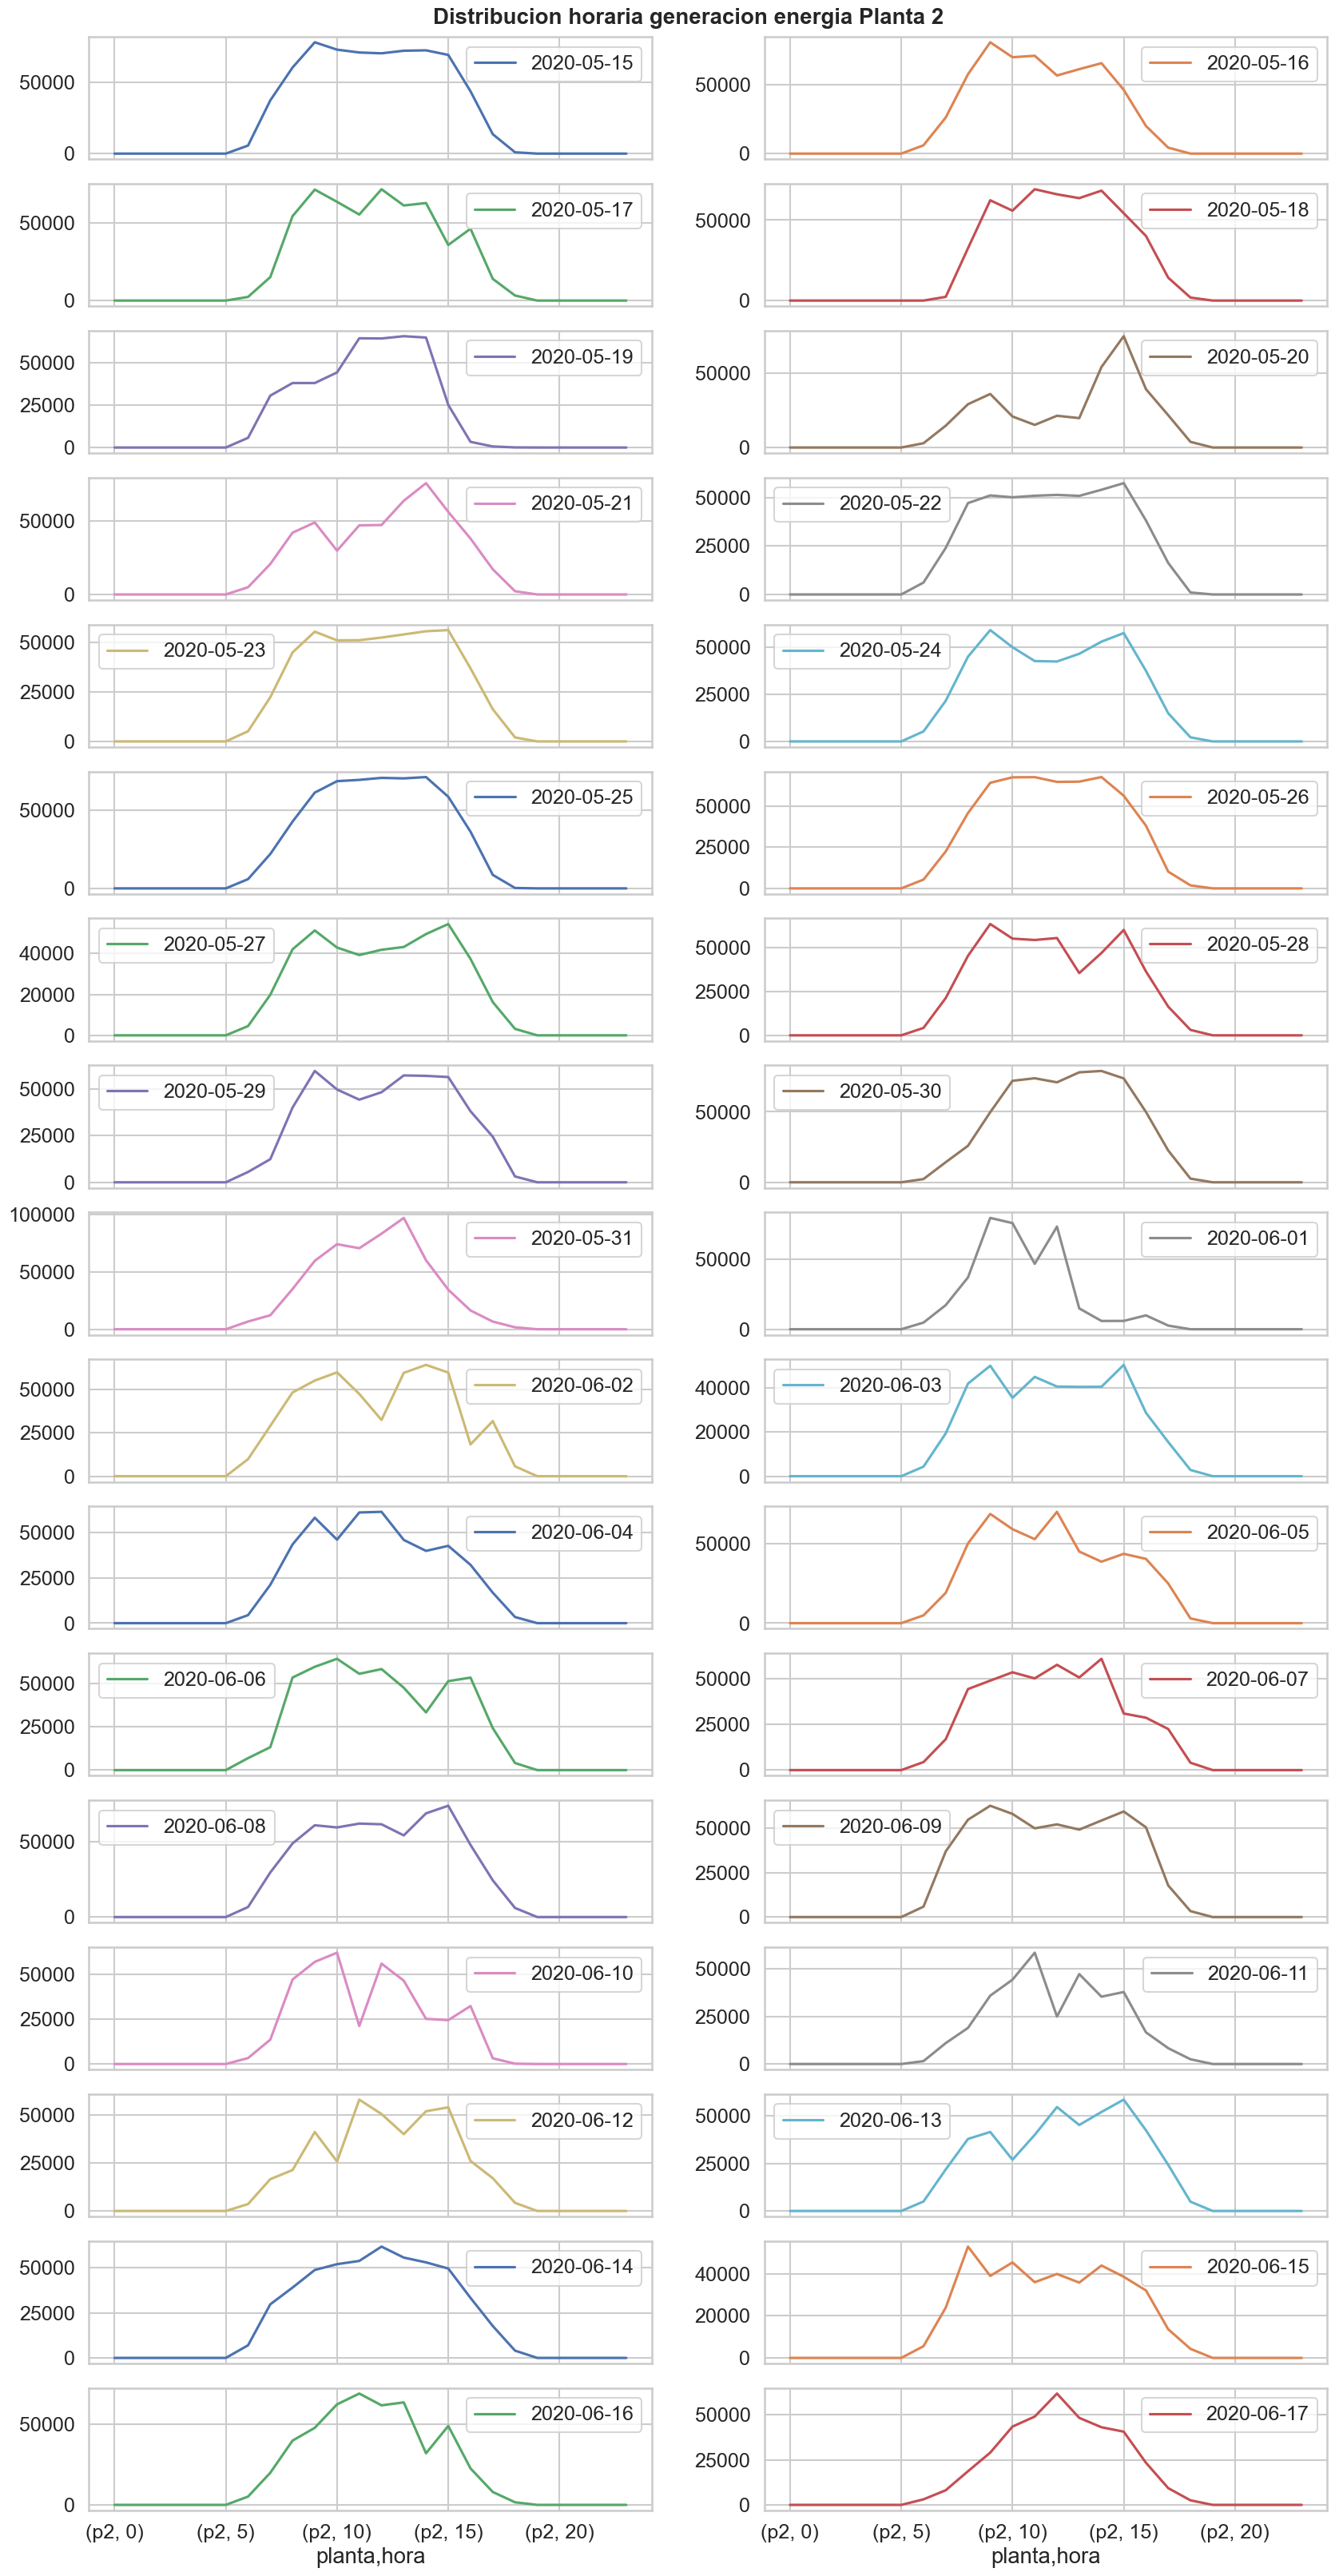

In [71]:
dc_constante_p2.unstack(level=1).plot(subplots = True, layout =(17,2), figsize=(20,36))
plt.suptitle('Distribucion horaria generacion energia Planta 2', fontsize=20, fontweight='bold')
plt.subplots_adjust(top=0.97) 
plt.show()

**<u>Conclusiones</u>**

    * Tanto en la planta 1 como la 2 no hay elementos estructurales que alteren la produccion de energia.

    * Consistentemente la produccion de la planta 2 tiene un produccion mucho menor.

**INSIGHT #2 --> la planta 2 genera sistematicamente menos DC que la planta 1 ante niveles similares de irradiacion.**

## 1.3.3 Transformacion de DC en AC

* <U> Preguntas semillas Transformacion en AC</U>


    - ¿Cual es la relacion entre irradiacion y generacion de AC?.
 
    - ¿Como se ve afectada la generacion de AC por la temperatura ambiente o del modulo?.
 
    - ¿La generacion de AC es similar entre ambas plantas?.
 
    - ¿ Como se distribuye la generacion de AC a lo largo del dia?.
 
    - ¿Esta distribucion es constante a lo largo de los dias?.
 
    - ¿Es constante a traves de todos los inverters?.
 
    - ¿Hay picos de generacion, son constantes, se producen en ambas plantas, hay relacion entre ambas plantas?.
 
    - ¿Hay fallos o averias en los inverters?¿Cada cuanto tiempo se producen?.

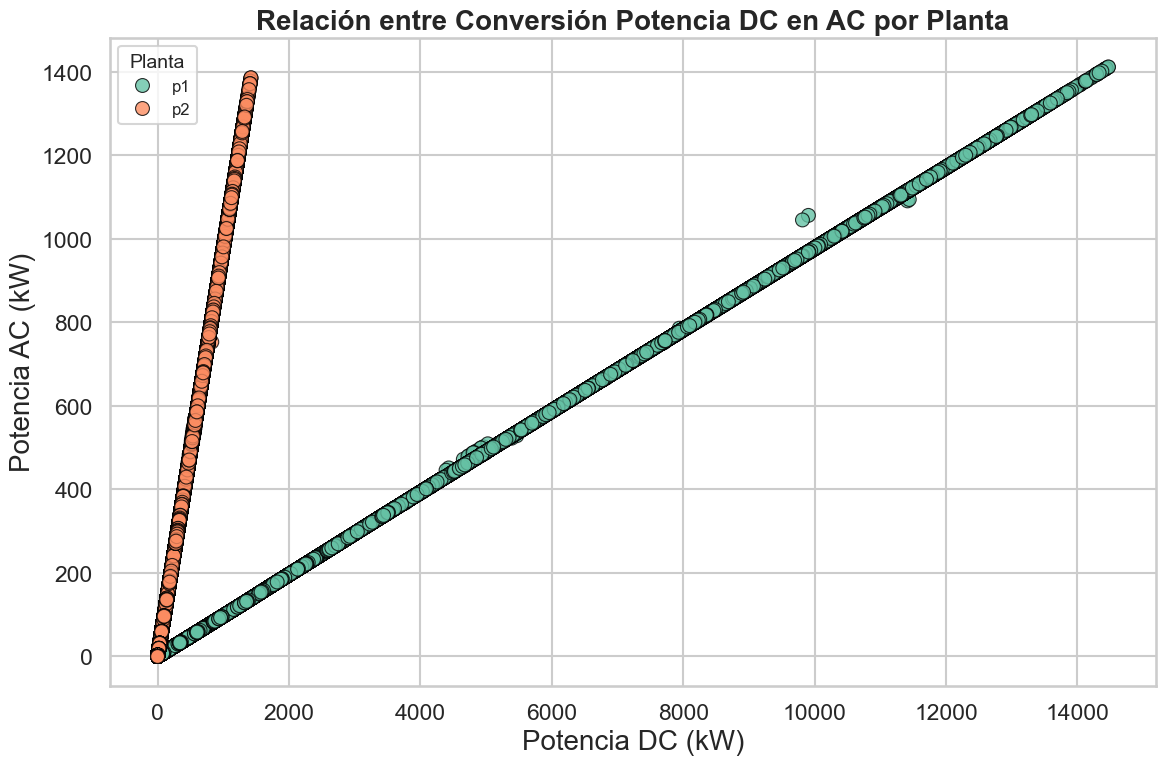

In [72]:
# Estilo general del gráfico
sns.set(style="whitegrid", context="talk")

# Tamaño del gráfico
plt.figure(figsize=(12, 8))

# Gráfico de dispersión
scatter = sns.scatterplot( data=df, x='kw_dc', y='kw_ac', hue='planta', palette='Set2', s=100, edgecolor='black', alpha=0.8)

# Títulos y etiquetas
plt.title('Relación entre Conversión Potencia DC en AC por Planta', fontsize=20, fontweight='bold')
plt.xlabel('Potencia DC (kW)', fontsize=20)
plt.ylabel('Potencia AC (kW)', fontsize=20)

# Leyenda
plt.legend(title='Planta', title_fontsize=14, fontsize=12, loc='best')

# Mejorar espaciado de los ejes
plt.tight_layout()

# Mostrar gráfico
plt.show()


**<U>Conclusiones</u>**

  - La planta 2 transforma en AC con mayor eficiencia que la 1, pese a generar menos DC

**Curva de generacion horaria de transformacion de DC a AC es constante**

In [73]:
temp = df.groupby(['planta','hora'], as_index = False).eficiencia.mean()
temp

planta  hora      eficiencia
0      p1     0            0.00
1      p1     1            0.00
2      p1     2            0.00
3      p1     3            0.00
4      p1     4            0.00
5      p1     5            0.00
6      p1     6            9.20
7      p1     7            9.80
8      p1     8            9.81
9      p1     9            9.78
10     p1    10            9.77
11     p1    11            9.75
12     p1    12            9.71
13     p1    13            9.68
14     p1    14            9.76
15     p1    15            9.79
16     p1    16            9.81
17     p1    17            9.76
18     p1    18            6.53
19     p1    19            0.00
20     p1    20            0.00
21     p1    21            0.00
22     p1    22            0.00
23     p1    23            0.00
24     p2     0            0.00
25     p2     1            0.00
26     p2     2            0.00
27     p2     3            0.00
28     p2     4            0.00
29     p2     5            0.58
30     p2     6           92.93
31     p2     7           97.39
32     p2     8           97.42
33     p2     9           91.70
34     p2    10           76.20
35     p2    11           68.35
36     p2    12           68.16
37     p2    13           73.04
38     p2    14           83.43
39     p2    15           95.69
40     p2    16           95.85
41     p2    17           95.56
42     p2    18           73.52
43     p2    19            0.00
44     p2    20            0.00
45     p2    21            0.00
46     p2    22            0.00
47     p2    23            0.00

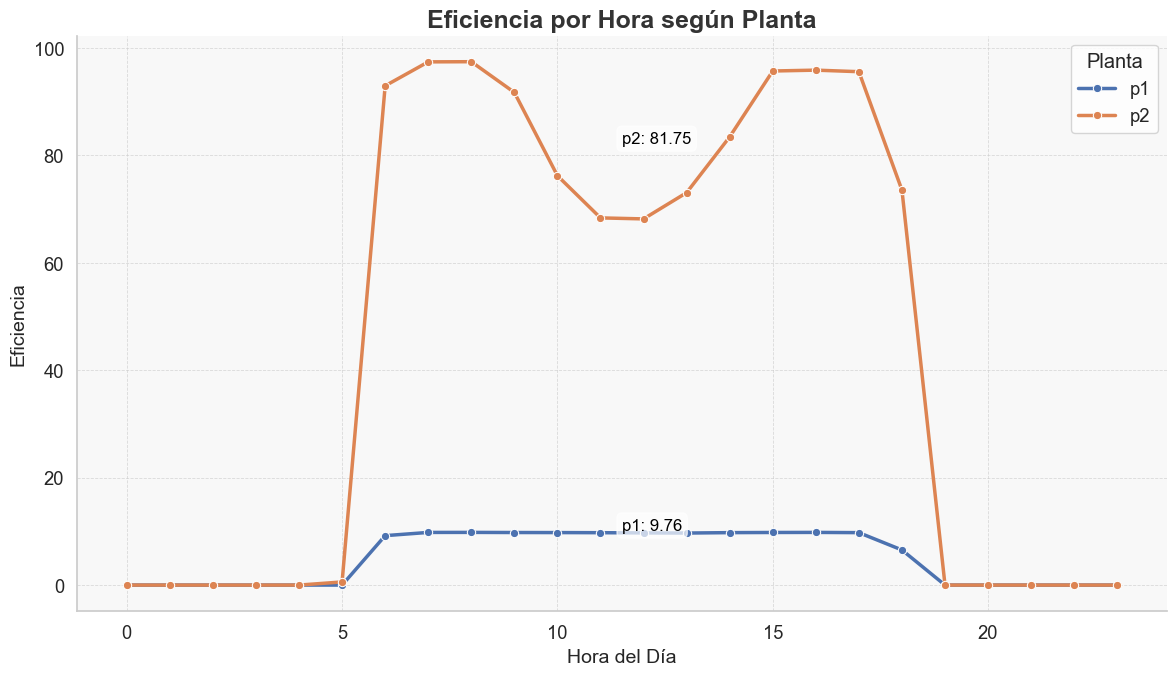

In [76]:
# Filtrar entre 8 y 15
temp_filtrado = temp[(temp['hora'] >= 8) & (temp['hora'] <= 15)]

# Calcular eficiencia media por planta
media_eficiencia = temp_filtrado.groupby('planta')['eficiencia'].mean().reset_index()

# Crear gráfico
sns.set(style="whitegrid", palette="deep", font_scale=1.2)
plt.figure(figsize=(12, 7))

# Gráfico de líneas con marcadores
sns.lineplot(data=temp, x='hora', y='eficiencia', hue='planta', linewidth=2.5, marker='o')

# Añadir anotaciones por planta
for i, row in media_eficiencia.iterrows():
    planta = row['planta']
    valor = row['eficiencia']
    
    # Buscar un punto medio (11:30) para posicionar las etiquetas 
    plt.text(
        11.5,                # posición x
        valor + 0.5,         # posición y (ligeramente encima del valor)
        f"{planta}: {valor:.2f}",  # texto
        fontsize=12,
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3')
    )

# Títulos y etiquetas
plt.title("Eficiencia por Hora según Planta", fontsize=18, fontweight='bold', color="#333")
plt.xlabel("Hora del Día", fontsize=14)
plt.ylabel("Eficiencia", fontsize=14)
plt.legend(title="Planta", loc='best', frameon=True)

# Mejorar fondo
plt.gca().set_facecolor("#F8F8F8")
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
sns.despine()

# Mostrar
plt.tight_layout()
plt.show()


**<U>Conclusiones</U>**

La planta 1 tiene una baja eficiencia, pero es constante. ¿Hay algun problema con los inverters?

La planta 2 tiene una eficiencia del 90%, pero presenta una caida de generacion, precisamente en las horas en las que mas irradiacion hay.

**INSIGHT #3** 

    - La Planta 1 presenta una eficiencia muy baja. ¿Podria estar relacionada con los inverters?.

**Curva de generacion horaria en la planta 2**

In [77]:
temp = df[['planta','hora','kw_dc','kw_ac']].melt(id_vars = ['planta','hora'])
temp

planta  hora variable           value
0          p1     0    kw_dc            0.00
1          p1     0    kw_dc            0.00
2          p1     0    kw_dc            0.00
3          p1     0    kw_dc            0.00
4          p1     0    kw_dc            0.00
...       ...   ...      ...             ...
272939     p2    23    kw_ac            0.00
272940     p2    23    kw_ac            0.00
272941     p2    23    kw_ac            0.00
272942     p2    23    kw_ac            0.00
272943     p2    23    kw_ac            0.00

[272944 rows x 4 columns]

### 1.3.3.1 Analisis Transformacion en AC para Planta 2

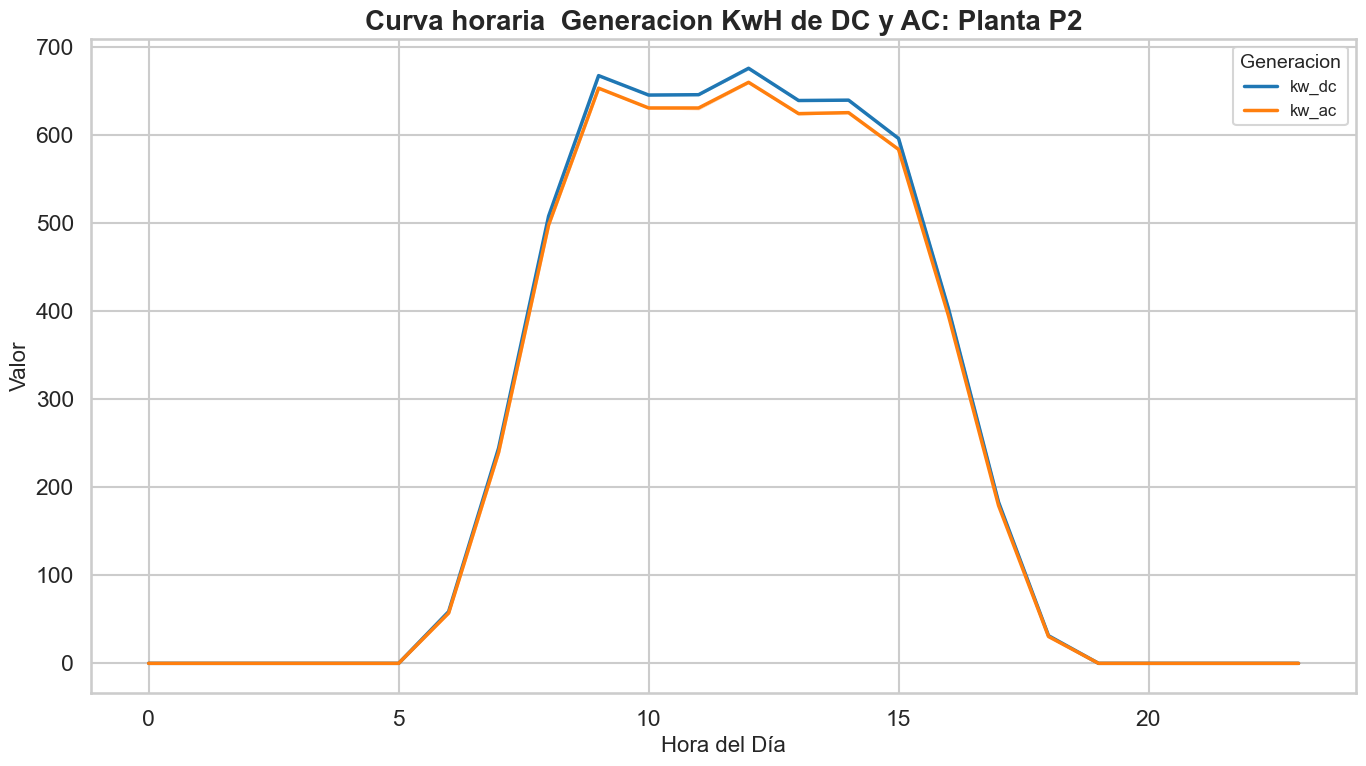

In [78]:
# Estilo visual
sns.set(style="whitegrid", context="talk")

# Crear la figura
plt.figure(figsize=(14, 8))

# Gráfico de línea
sns.lineplot( data=temp[temp.planta == 'p2'], x='hora', y='value', hue='variable', palette='tab10', linewidth=2.5, errorbar=('ci', False))

# Título y etiquetas
plt.title('Curva horaria  Generacion KwH de DC y AC: Planta P2', fontsize=20, fontweight='bold')
plt.xlabel('Hora del Día', fontsize=16)
plt.ylabel('Valor', fontsize=16)

# Leyenda
plt.legend(title='Generacion', title_fontsize=14, fontsize=12, loc='best')

# Ajustar espacio
plt.tight_layout()

# Mostrar gráfico
plt.show()

**<U>CONCLUSIONES:</U>**

    - En las horas centrales, donde hay mas irradiacion, existe una caida en la relacion de DC y AC, pero no de la magnitud observada en el grafico comparativo entre plantas.

    - No obstante a fin de visualizarlo mejor se procede a obtener un zoom del grafico en esas horas de mas irradiacion.

In [79]:
temp = df.between_time('08:00:00','15:00:00')
temp= temp [temp.planta == 'p2']
temp

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
...                             ...             ...             ...   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 08:00:00  4UPUqMRk7TRMgml          581.05          569.41   
2020-05-15 08:00:00  81aHJ1q11NBPMrL          534.67          524.09   
2020-05-15 08:00:00  9kRcWv60rDACzjR          568.53          557.16   
2020-05-15 08:00:00  Et9kgGMDl729KT4          526.24          515.83   
2020-05-15 08:00:00  IQ2d7wF4YD8zU1Q          578.17          566.58   
...                              ...             ...             ...   
2020-06-17 15:00:00  q49J1IKaHRwDQnt          562.34          551.13   
2020-06-17 15:00:00  rrq4fwE8jgrTyWY          534.27          523.71   
2020-06-17 15:00:00  vOuJvMaM2sgwLmb          578.85          567.15   
2020-06-17 15:00:00  xMbIugepa2P7lBB          568.86          557.49   
2020-06-17 15:00:00  xoJJ8DcxJEcupym          578.49          566.90   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 08:00:00           98.00          554.00      2429565.00   
2020-05-15 08:00:00           98.02          516.60   1215279252.60   
2020-05-15 08:00:00           98.00          551.80   2247720128.80   
2020-05-15 08:00:00           98.02          503.00      1704753.00   
2020-05-15 08:00:00           97.99          552.79     19942078.79   
...                             ...             ...             ...   
2020-06-17 15:00:00           98.01         3380.87       519981.87   
2020-06-17 15:00:00           98.02         3190.40    121130615.40   
2020-06-17 15:00:00           97.98         3534.07      2426903.07   
2020-06-17 15:00:00           98.00         3433.50    106895609.50   
2020-06-17 15:00:00           98.00         3534.67    209334959.67   

                           date  
fecha                            
2020-05-15 08:00:00  2020-05-15  
2020-05-15 08:00:00  2020-05-15  
2020-05-15 08:00:00  2020-05-15  
2020-05-15 08:00:00  2020-05-15  
2020-05-15 08:00:00  2020-05-15  
...                         ...  
2020-06-17 15:00:00  2020-06-17  
2020-

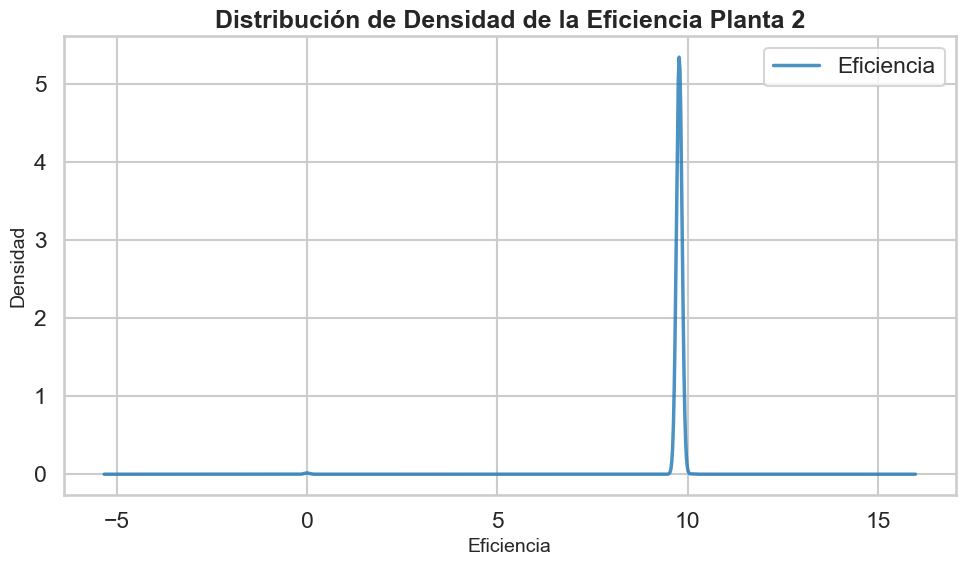

In [97]:
# Estilo
sns.set(style="whitegrid", context="talk")

# Crear figura
plt.figure(figsize=(10, 6))

# Plot usando pandas
temp.eficiencia.plot.density( linewidth=2.5, color='#1f77b4', alpha=0.8, label='Eficiencia')

# Estética
plt.title('Distribución de Densidad de la Eficiencia Planta 2', fontsize=18, fontweight='bold')
plt.xlabel('Eficiencia', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

Al definir la eficiencia lo hicimos imputando ceros, si eliminamos esas lecturas vamos a ver que sucede.

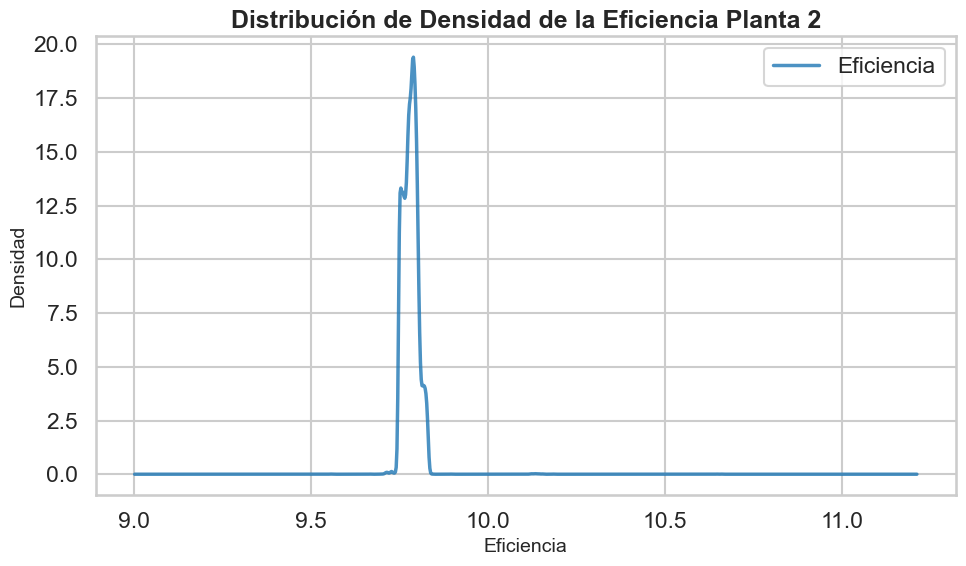

In [98]:
# Estilo
sns.set(style="whitegrid", context="talk")

# Crear figura
plt.figure(figsize=(10, 6))

# Plot usando pandas
temp[temp.kw_dc > 0 ].eficiencia.plot.density(linewidth=2.5, color='#1f77b4', alpha=0.8, label='Eficiencia')

# Estética
plt.title('Distribución de Densidad de la Eficiencia Planta 2', fontsize=18, fontweight='bold')
plt.xlabel('Eficiencia', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

Eliminando los ceros ya se puede aprenciar que la eficiencia ya tiene los valores esperados.

In [99]:
temp['kw_dc_cero'] = np.where(temp['kw_dc']==0, 1,0)
temp

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
...                             ...             ...             ...   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 08:00:00  1BY6WEcLGh8j5v7         3246.00          318.67   
2020-05-15 08:00:00  1IF53ai7Xc0U56Y         2805.62          275.46   
2020-05-15 08:00:00  3PZuoBAID5Wc2HD         2736.12          268.62   
2020-05-15 08:00:00  7JYdWkrLSPkdwr4         2741.50          269.15   
2020-05-15 08:00:00  McdE0feGgRqW7Ca         3208.88          315.05   
...                              ...             ...             ...   
2020-06-17 15:00:00  uHbuxQJl8lW7ozc         4719.62          462.89   
2020-06-17 15:00:00  wCURE6d3bPkepu2         5077.75          497.80   
2020-06-17 15:00:00  z9Y9gH1T5YWrNuG         5113.00          501.29   
2020-06-17 15:00:00  zBIq5rxdHJRwDNY         4675.38          458.61   
2020-06-17 15:00:00  zVJPv84UY57bAof         4853.75          475.96   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 08:00:00            9.82          263.57      6259822.57   
2020-05-15 08:00:00            9.82          292.50      6183937.50   
2020-05-15 08:00:00            9.82          287.75      6988046.75   
2020-05-15 08:00:00            9.82          281.00      7603241.00   
2020-05-15 08:00:00            9.82          291.00      7159255.00   
...                             ...             ...             ...   
2020-06-17 15:00:00            9.81         5423.50      7286458.50   
2020-06-17 15:00:00            9.80         5343.75      7028061.75   
2020-06-17 15:00:00            9.80         5282.88      7250667.88   
2020-06-17 15:00:00            9.81         5284.75      6582836.75   
2020-06-17 15:00:00            9.81         5368.75      7362730.75   

                           date  kw_dc_cero  
fecha                                        
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15    

In [100]:
temp.groupby('kw_dc_cero')[['irradiacion', 't_ambiente', 't_modulo']].mean()

irradiacion      t_ambiente        t_modulo
kw_dc_cero                                                
0                     0.61           28.31           46.13
1                     0.76           28.19           49.59

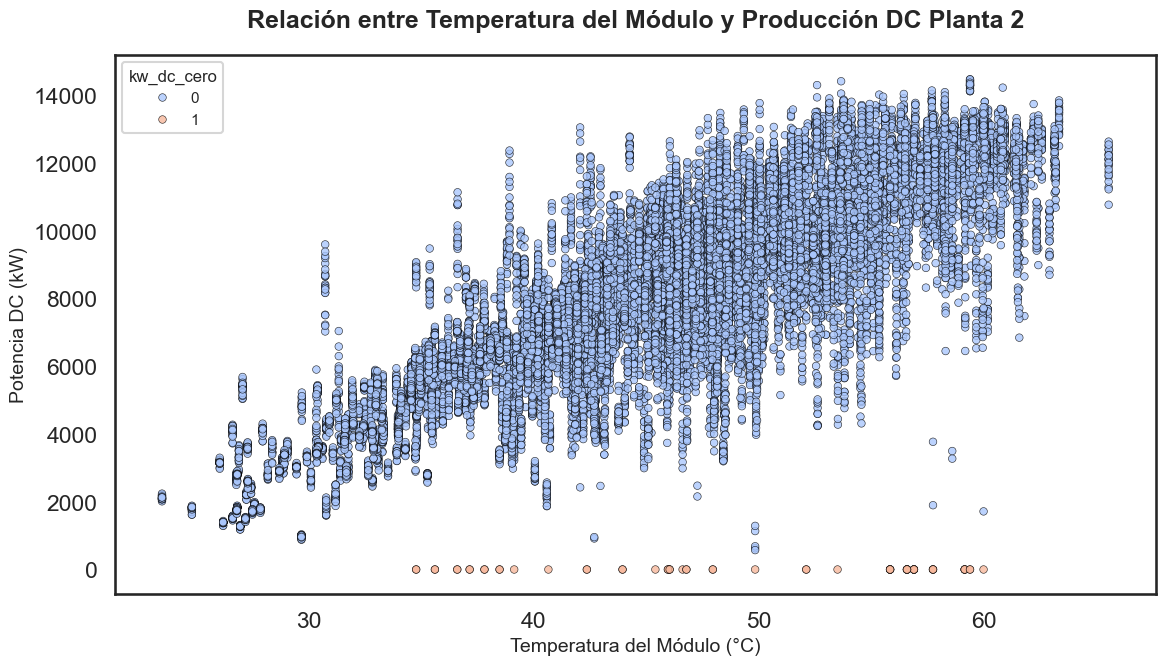

In [117]:
# Estilo 
sns.set(style="white", context="talk")

# Crear la figura
plt.figure(figsize=(12, 7))

# Scatterplot embellecido
scatter = sns.scatterplot( data=temp, x='t_modulo', y='kw_dc', hue='kw_dc_cero', palette='coolwarm', edgecolor='black', alpha=0.8, s=30 )

# Títulos y etiquetas
plt.title('Relación entre Temperatura del Módulo y Producción DC Planta 2', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Temperatura del Módulo (°C)', fontsize=14)
plt.ylabel('Potencia DC (kW)', fontsize=14)

# Leyenda
plt.legend(title= 'kw_dc_cero', title_fontsize=12, fontsize=11, loc='upper left', frameon=True)

# Ajustar espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**CONCLUSIONES**
- Hay correlacion entre la temperatura del modulo y la generacion de DC.
- Lo que queriamos ver es si con elevadas temperaturas de modulo habia caida en la generaciond de DC, vemos que no es asi.

Con el indicador que hemos creado para monitorizar la produccion de DC cero vamos a monitorizar las variables categoricas.

Comenzamos por la variable Inverters

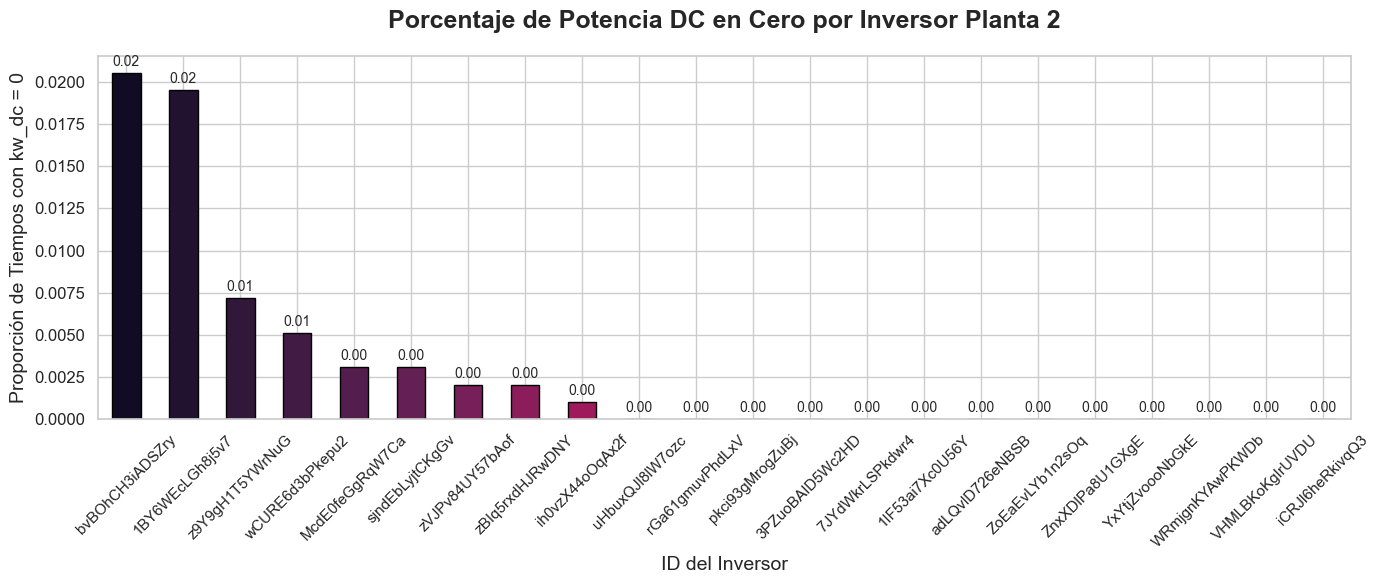

In [116]:
# Estilo general
sns.set(style="whitegrid")

# Datos ordenados
data = temp.groupby('inverter_id')['kw_dc_cero'].mean().sort_values(ascending=False)

# Crear la figura
fig, ax = plt.subplots(figsize=(14, 6))

# Gráfico de barras embellecido
bars = data.plot.bar(
    ax=ax,color=sns.color_palette("rocket", len(data)), edgecolor='black')

# Títulos y etiquetas
ax.set_title('Porcentaje de Potencia DC en Cero por Inversor Planta 2', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('ID del Inversor', fontsize=14)
ax.set_ylabel('Proporción de Tiempos con kw_dc = 0', fontsize=14)

# Ejes y texto
ax.tick_params(axis='x', rotation=45, labelsize=11)
ax.tick_params(axis='y', labelsize=12)

# Agregar etiquetas de valor encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Ajustar diseño
plt.tight_layout()
plt.show()

* Hay una gran diferencia en el porcentaje de produccion cero de DC por inverter, oscila entre un 30 y un 5%.

**INSIGHT #4**
    En la planta 2 hay varios inverters a los que no le llega generacion de de DC, y requieren mantenimiento.

Dada esa disparidad de rendimiento entre inverters vamos a dibujar los boxplots de todos los inverters para determinar una eficiencia media que permita distinguir entre inverters buenos y malos.

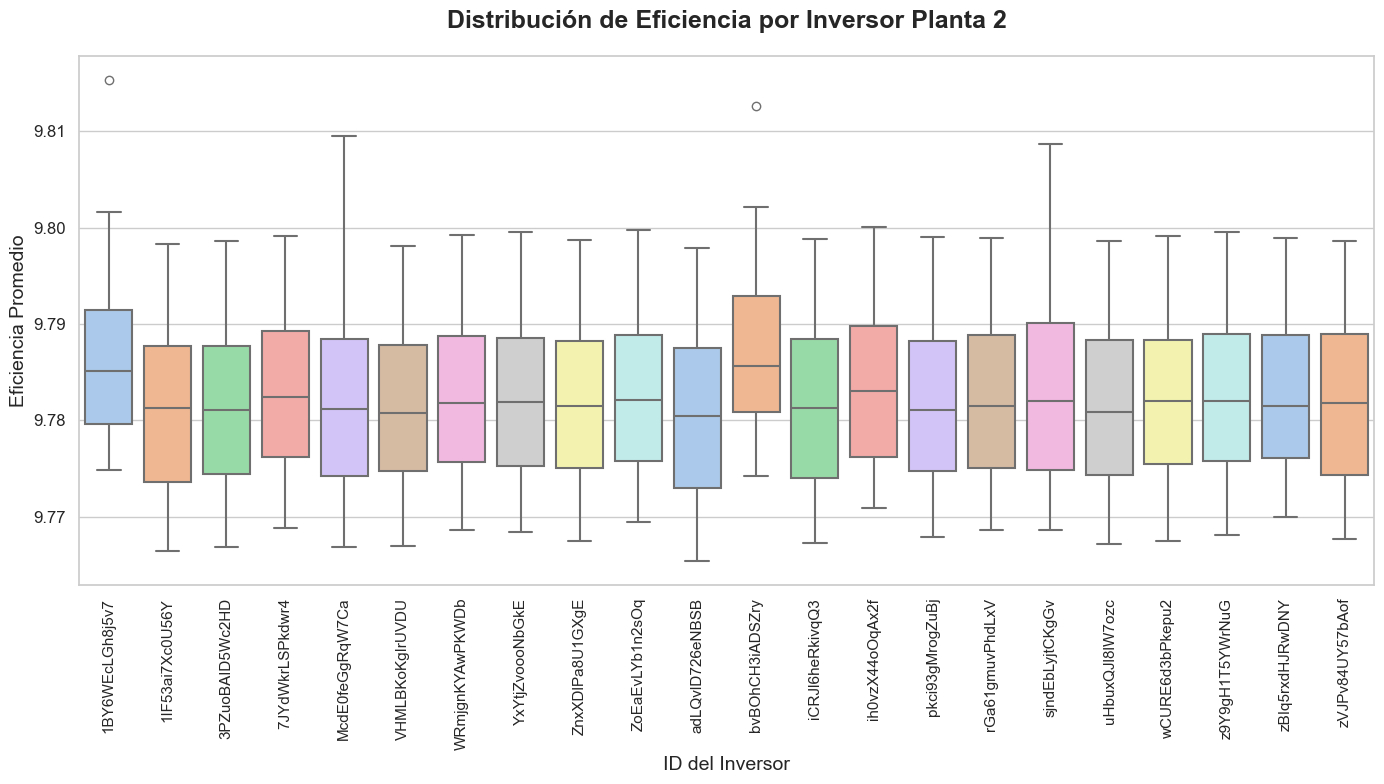

In [114]:
# Agrupar datos
df_box = (temp[temp.kw_dc > 0].groupby(['inverter_id', 'date'], as_index=False).eficiencia.mean())

# Calcular tamaño dinámico
num_inverters = df_box['inverter_id'].nunique()
fig_width = max(14, num_inverters * 0.6)

# Crear figura
plt.figure(figsize=(fig_width, 8))

sns.boxplot( data=df_box, x='inverter_id',y='eficiencia', hue='inverter_id', palette='pastel', 
            dodge=False, legend=False, linewidth=1.5, showfliers=True )

# Títulos y etiquetas
plt.title('Distribución de Eficiencia por Inversor Planta 2', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('ID del Inversor', fontsize=14)
plt.ylabel('Eficiencia Promedio', fontsize=14)

# Ajuste visual
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**INSIGHT #5**

* Una vez que hemos descontado el problema de la no generacion de DC, los inverters de la planta 2 si funcionan bien y cumplen con su mision de convertir en AC con una del 97% de eficiencia.



No obstante esta es una foto fija que nos proporciona los totales de cada inverter. Procede obtener una grafica que nos permita ver el funcionamiento de los mismos a traves del tiempo, en busca de momentos puntuales que hayan podido generar problemas.

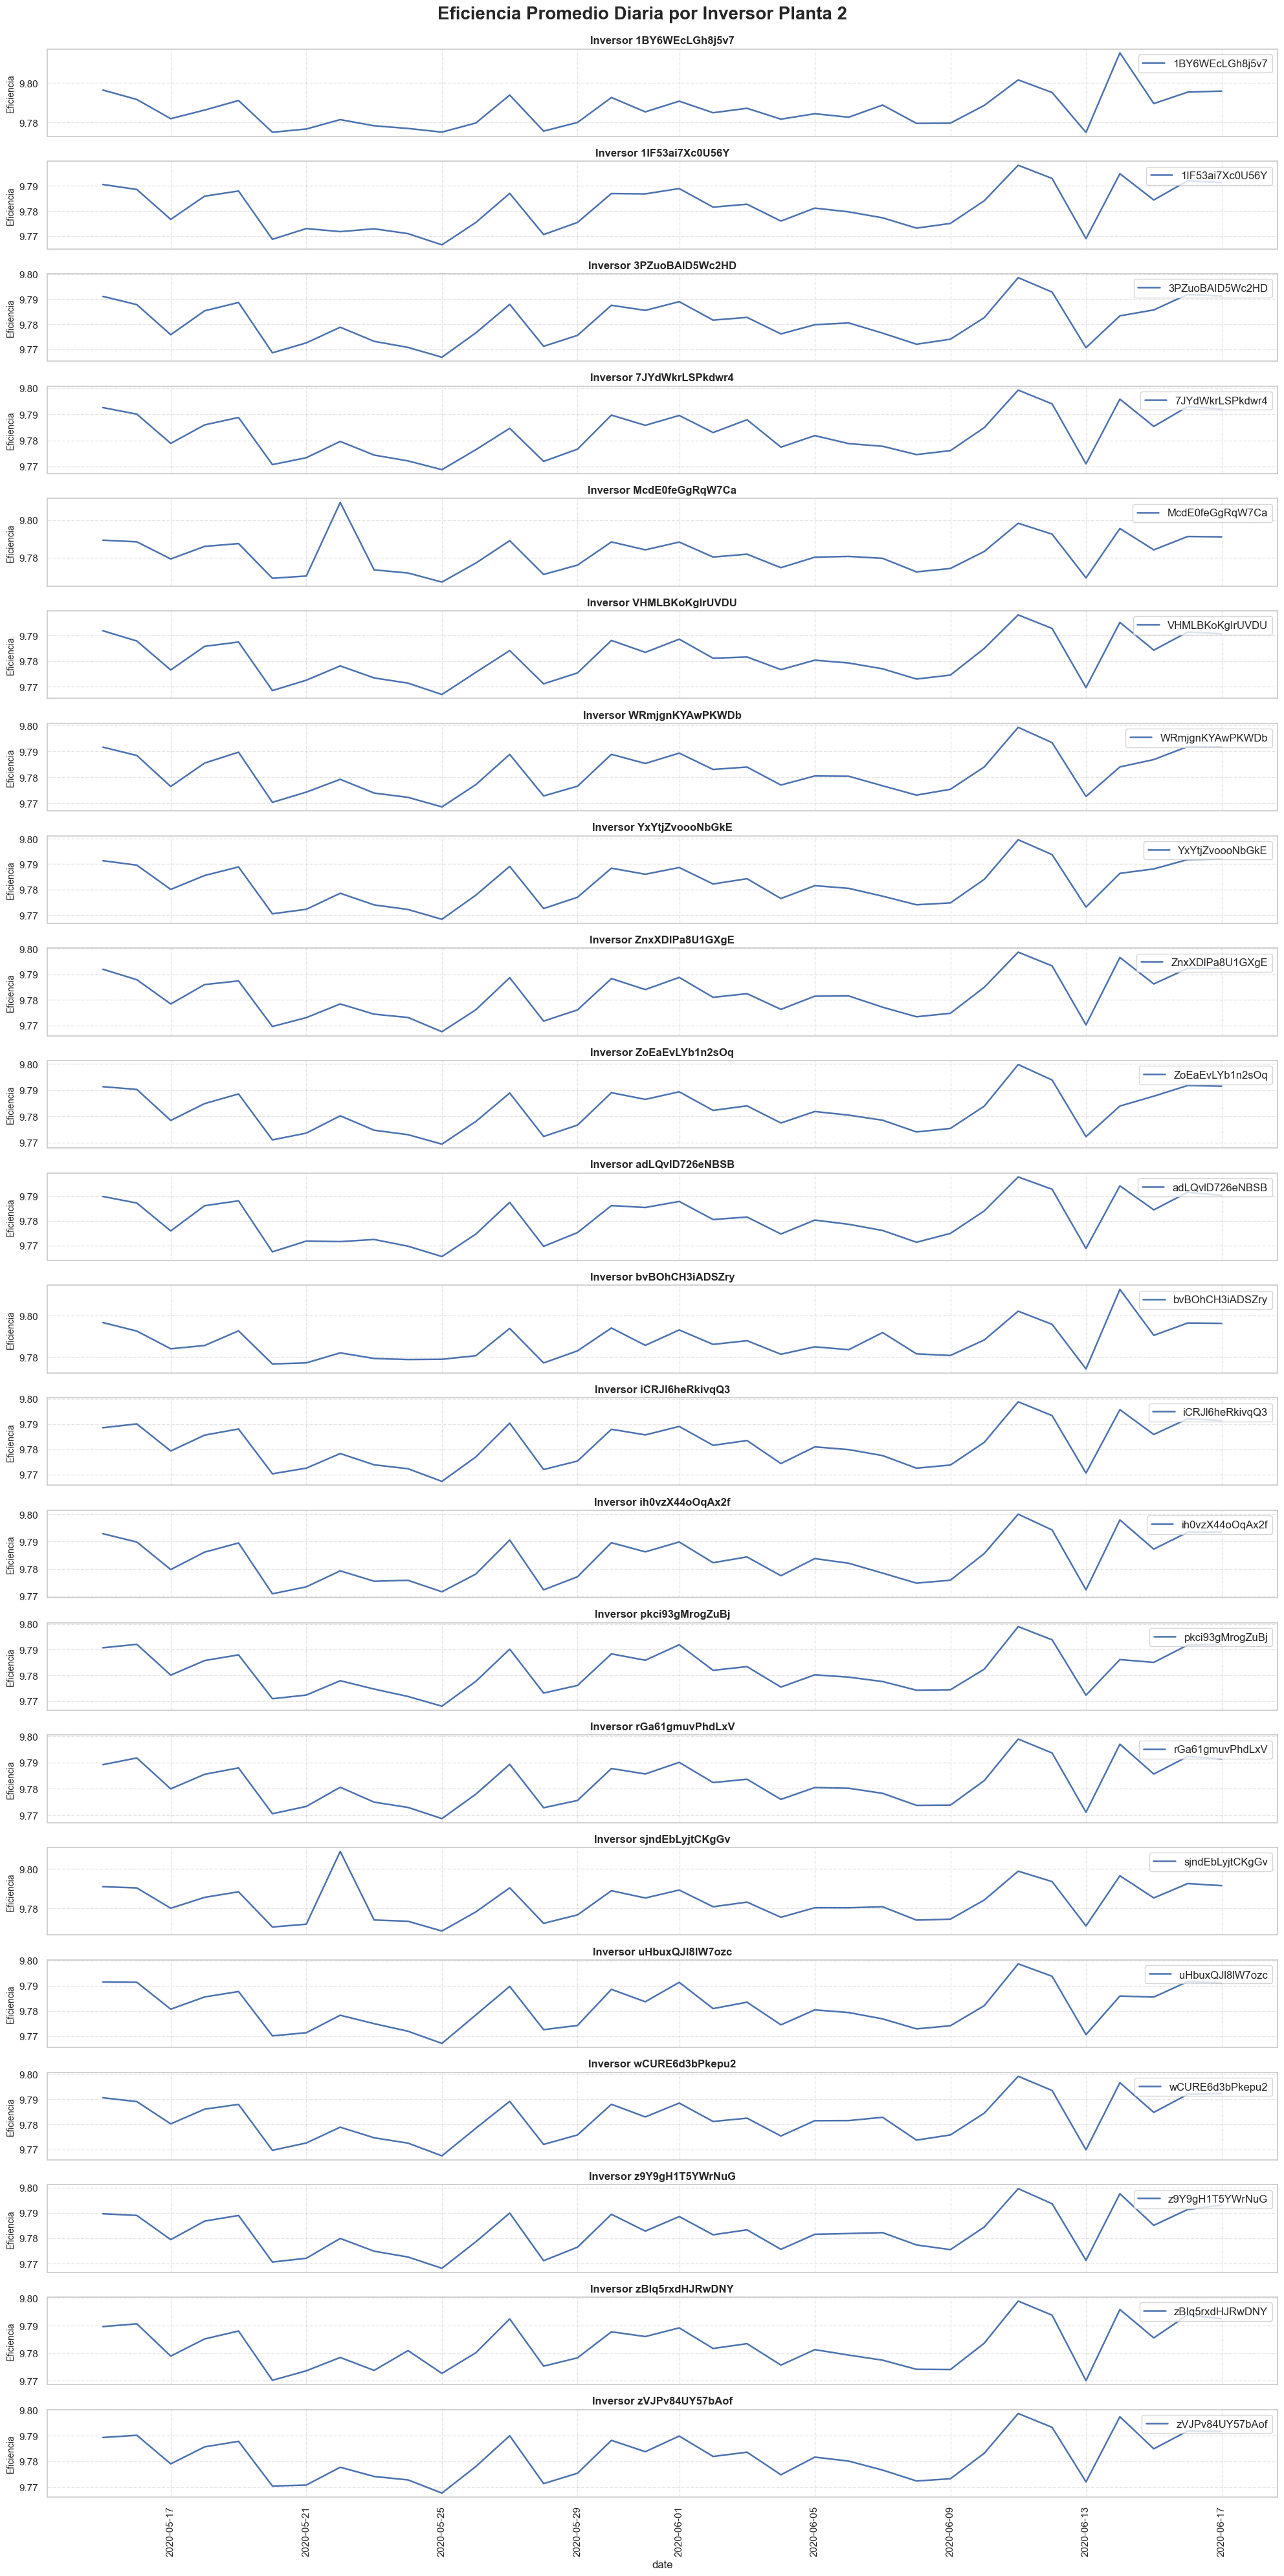

In [115]:
# Preparar los datos
df_plot = (temp[temp.kw_dc > 0].groupby(['inverter_id', 'date']).eficiencia.mean() .unstack(level=0) )

# Crear figura y subplots
fig, axes = plt.subplots( nrows=len(df_plot.columns), ncols=1, sharex=True, figsize=(20, 40))

# Dibujar cada serie en su subplot
for idx, column in enumerate(df_plot.columns):
    ax = axes[idx]
    df_plot[column].plot(ax=ax, linewidth=1.8, label=column)
    ax.set_ylabel('Eficiencia', fontsize=10)
    ax.set_title(f'Inversor {column}', fontsize=12, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper right', fontsize=12)

# Rotar ticks del eje X en el último subplot
axes[-1].tick_params(axis='x', rotation=90)

# Título general con menos espacio
fig.suptitle('Eficiencia Promedio Diaria por Inversor Planta 2',
             fontsize=20, fontweight='bold', y=0.995)

# Ajustar layout para que quede todo pegado y bien distribuido
plt.subplots_adjust(hspace=0.4)  # Espacio vertical entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.999])  # Deja espacio justo debajo del título
plt.show()

### 1.3.3.2 Analisis Transformacion en AC para Planta 1

In [106]:
temp = df.between_time('08:00:00','15:00:00')
temp = temp[temp.planta == 'p1']
temp['kw_dc_cero'] = np.where(temp['kw_dc'] == 0, 1, 0)
temp

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
...                             ...             ...             ...   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 08:00:00  1BY6WEcLGh8j5v7         3246.00          318.67   
2020-05-15 08:00:00  1IF53ai7Xc0U56Y         2805.62          275.46   
2020-05-15 08:00:00  3PZuoBAID5Wc2HD         2736.12          268.62   
2020-05-15 08:00:00  7JYdWkrLSPkdwr4         2741.50          269.15   
2020-05-15 08:00:00  McdE0feGgRqW7Ca         3208.88          315.05   
...                              ...             ...             ...   
2020-06-17 15:00:00  uHbuxQJl8lW7ozc         4719.62          462.89   
2020-06-17 15:00:00  wCURE6d3bPkepu2         5077.75          497.80   
2020-06-17 15:00:00  z9Y9gH1T5YWrNuG         5113.00          501.29   
2020-06-17 15:00:00  zBIq5rxdHJRwDNY         4675.38          458.61   
2020-06-17 15:00:00  zVJPv84UY57bAof         4853.75          475.96   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 08:00:00            9.82          263.57      6259822.57   
2020-05-15 08:00:00            9.82          292.50      6183937.50   
2020-05-15 08:00:00            9.82          287.75      6988046.75   
2020-05-15 08:00:00            9.82          281.00      7603241.00   
2020-05-15 08:00:00            9.82          291.00      7159255.00   
...                             ...             ...             ...   
2020-06-17 15:00:00            9.81         5423.50      7286458.50   
2020-06-17 15:00:00            9.80         5343.75      7028061.75   
2020-06-17 15:00:00            9.80         5282.88      7250667.88   
2020-06-17 15:00:00            9.81         5284.75      6582836.75   
2020-06-17 15:00:00            9.81         5368.75      7362730.75   

                           date  kw_dc_cero  
fecha                                        
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15    

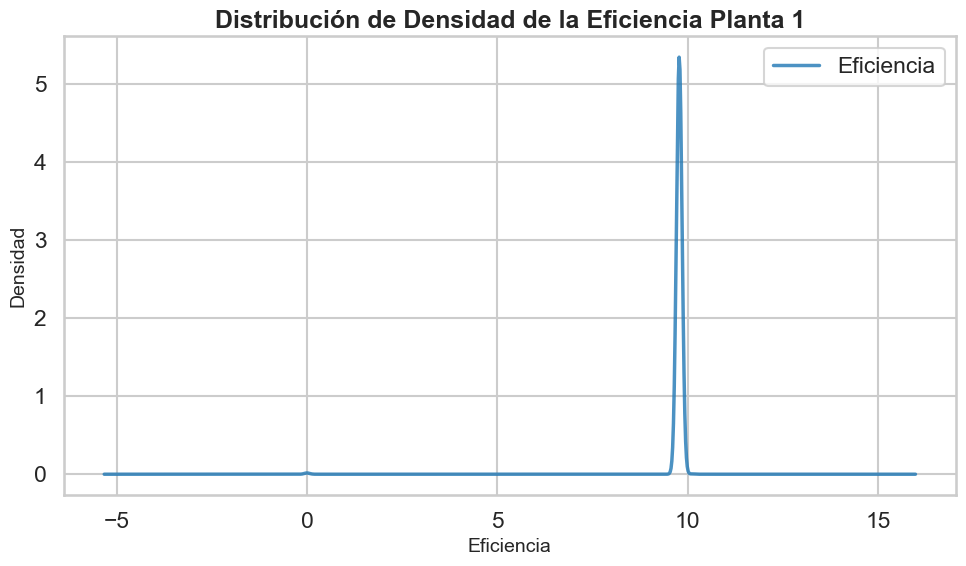

In [108]:
# Estilo
sns.set(style="whitegrid", context="talk")

# Crear figura
plt.figure(figsize=(10, 6))

# Plot usando pandas
temp.eficiencia.plot.density( linewidth=2.5, color='#1f77b4', alpha=0.8, label='Eficiencia')

# Estética
plt.title('Distribución de Densidad de la Eficiencia Planta 1', fontsize=18, fontweight='bold')
plt.xlabel('Eficiencia', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

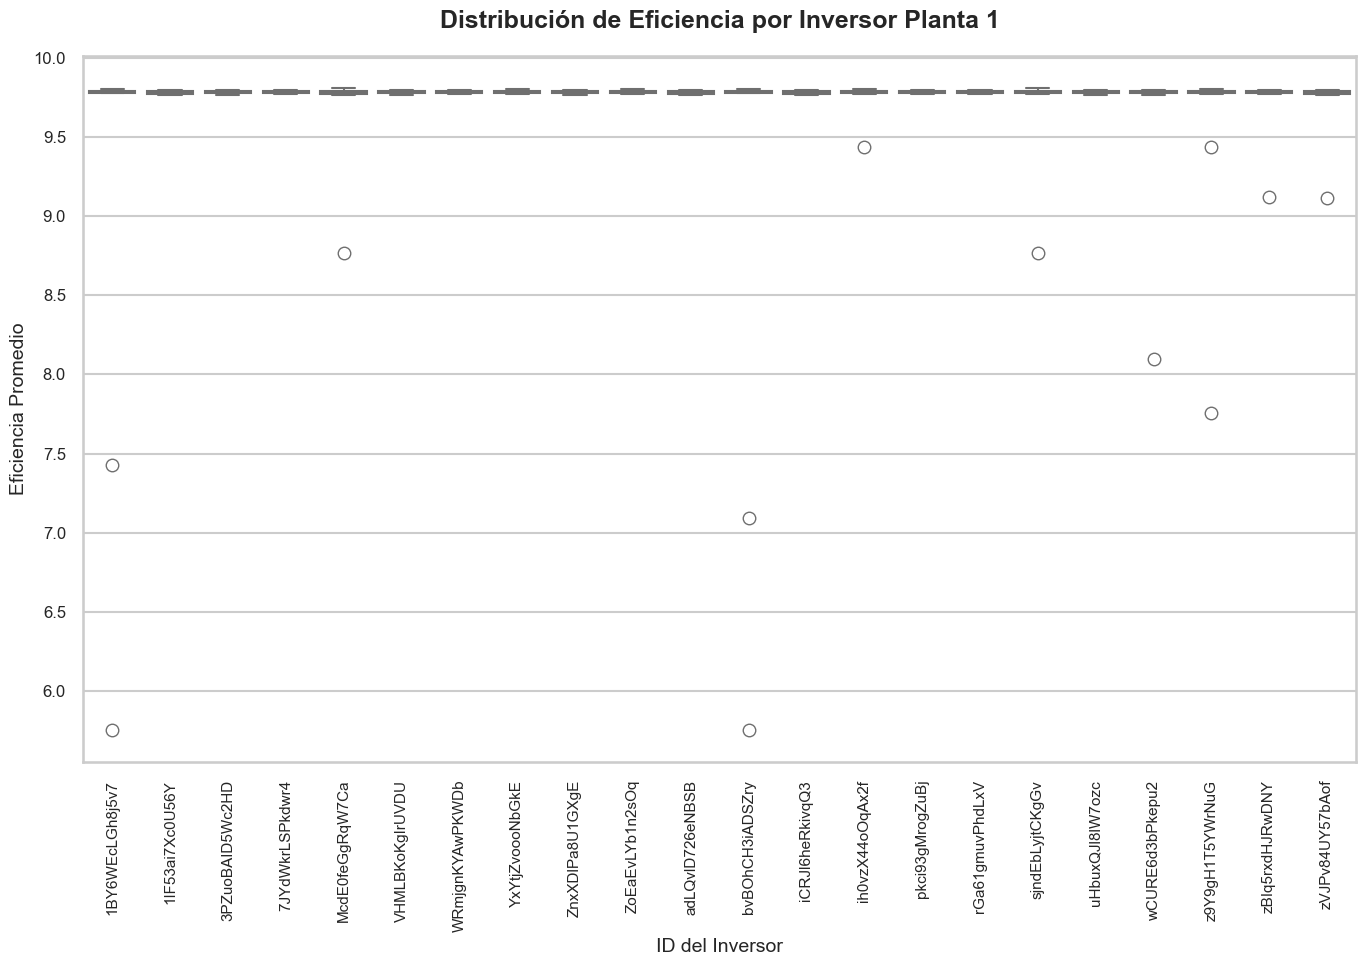

In [109]:
# Agrupar datos
df_box = (
    temp.groupby(['inverter_id', 'date'], as_index=False) .eficiencia.mean())

# Calcular tamaño dinámico
num_inverters = df_box['inverter_id'].nunique()
fig_width = max(14, num_inverters * 0.6)

# Crear figura
plt.figure(figsize=(fig_width, 10))

sns.boxplot( data=df_box, x='inverter_id',y='eficiencia', hue='inverter_id', palette='pastel', 
            dodge=False, legend=False, linewidth=1.5, showfliers=True )

# Títulos y etiquetas
plt.title('Distribución de Eficiencia por Inversor Planta 1', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('ID del Inversor', fontsize=14)
plt.ylabel('Eficiencia Promedio', fontsize=14)

# Ajuste visual
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

 La eficiencia es muy baja pero constante. Hemos asumido que los datos son correctos, pero los inverters no estan funcionando correctamente.

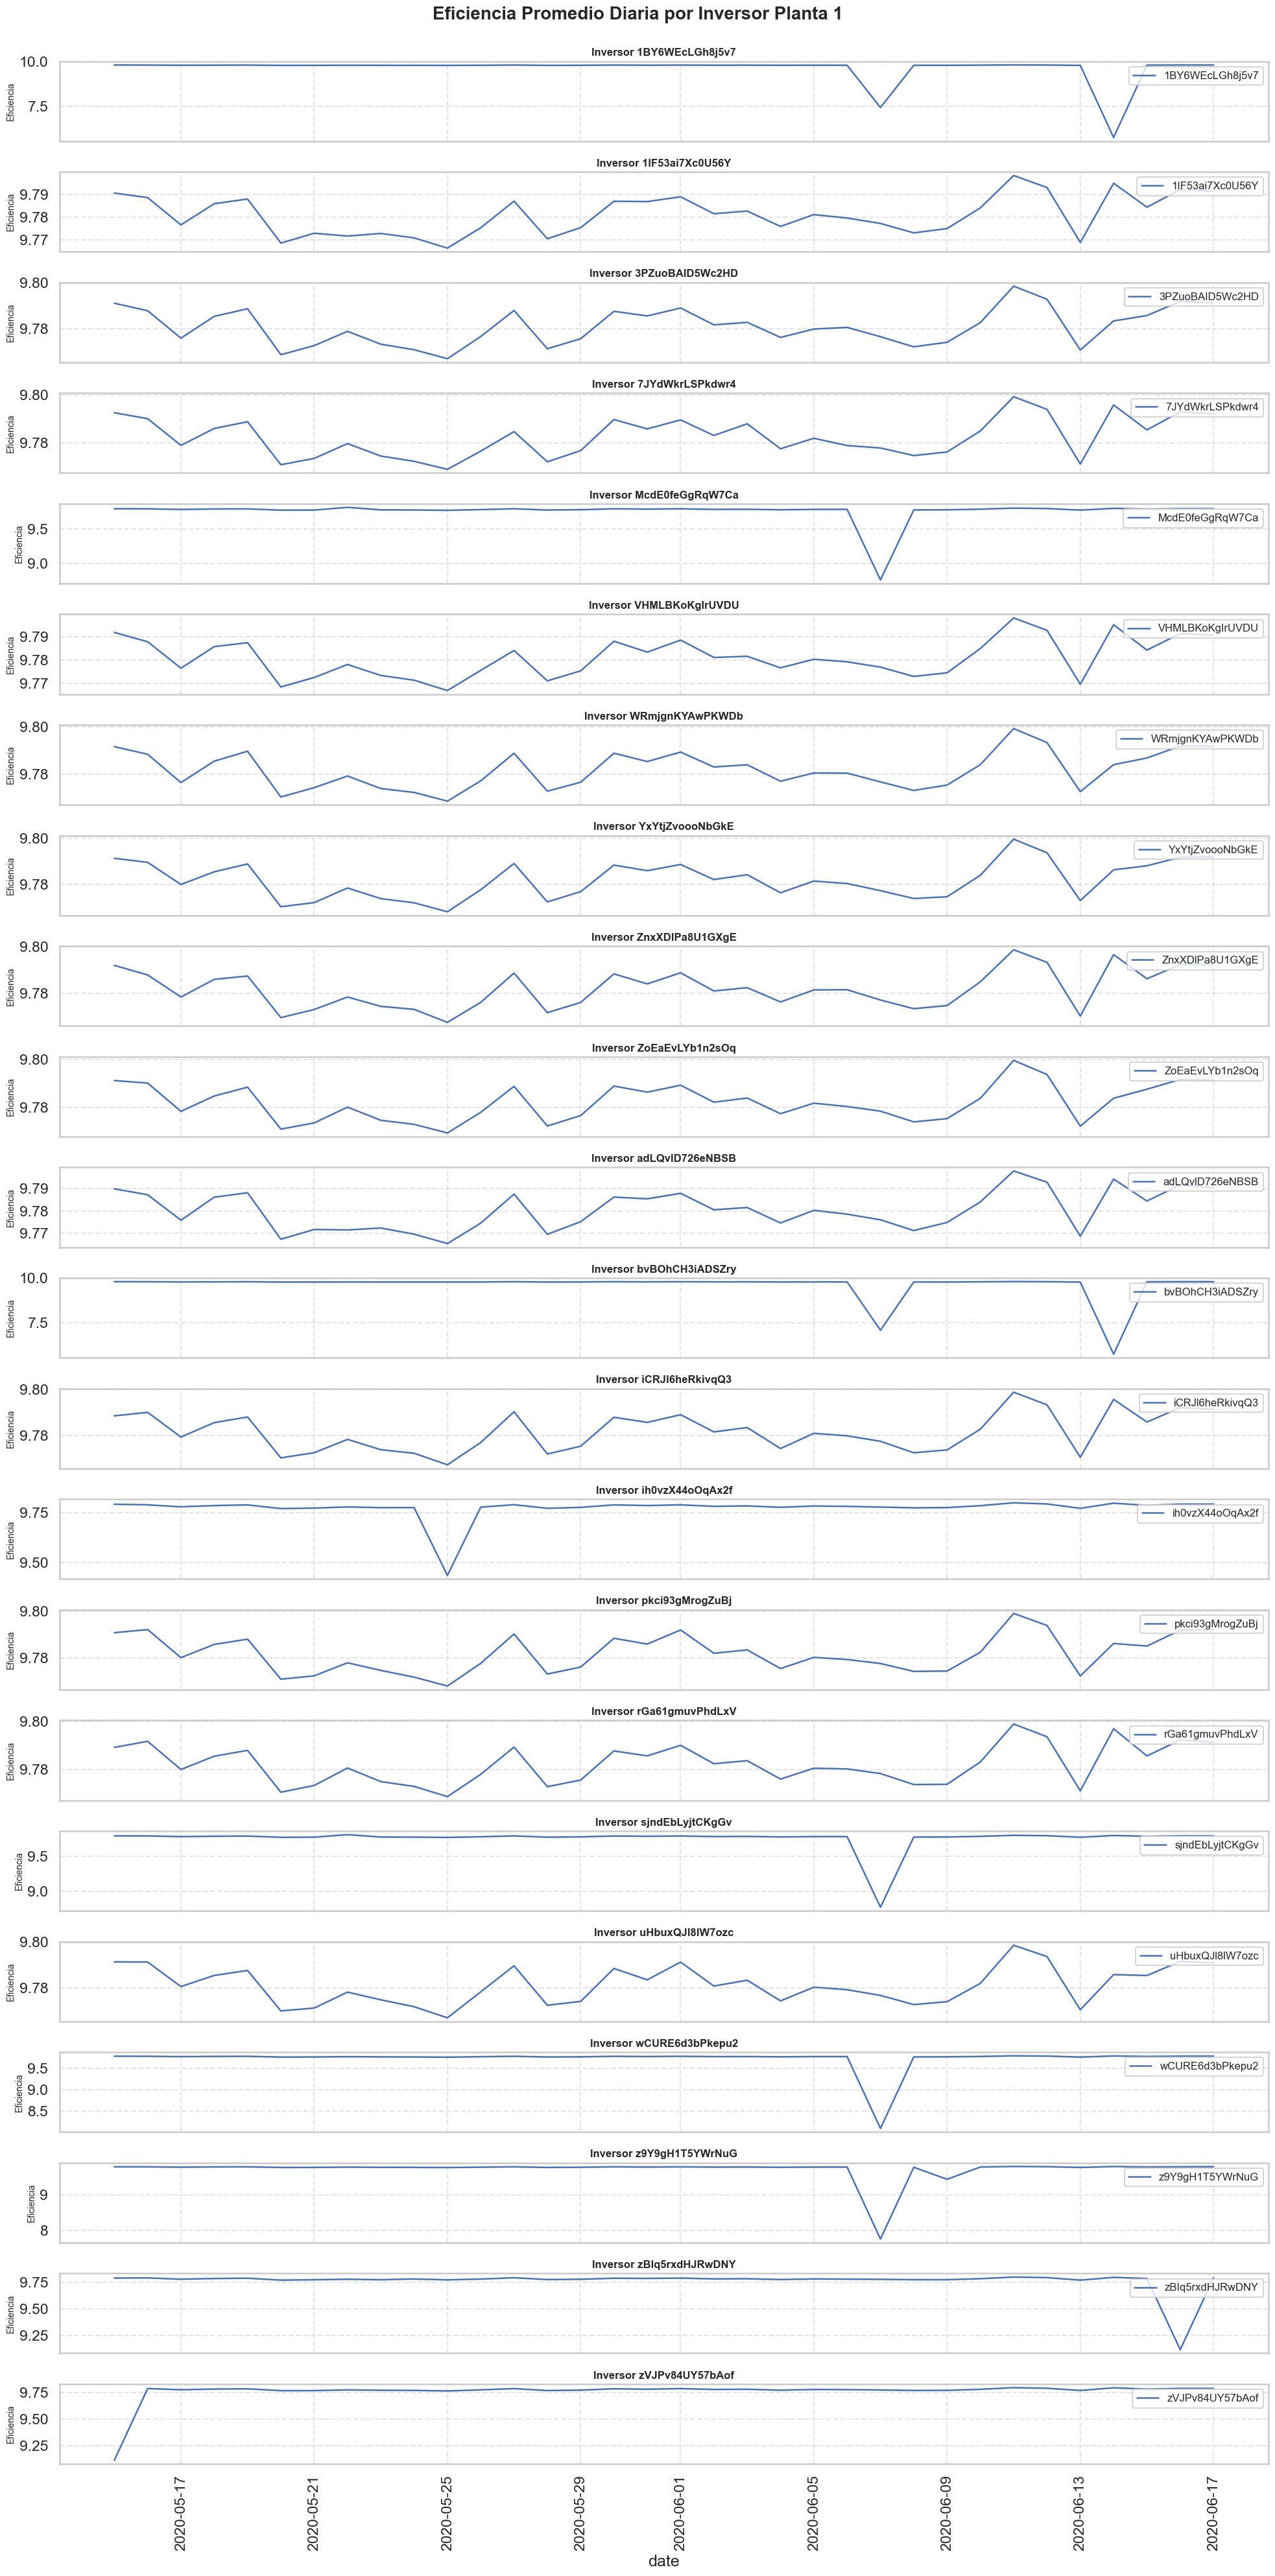

In [111]:
# Preparar los datos
df_plot = (temp.groupby(['inverter_id', 'date']).eficiencia.mean() .unstack(level=0) )

# Crear figura y subplots
fig, axes = plt.subplots( nrows=len(df_plot.columns), ncols=1, sharex=True, figsize=(20, 40))

# Dibujar cada serie en su subplot
for idx, column in enumerate(df_plot.columns):
    ax = axes[idx]
    df_plot[column].plot(ax=ax, linewidth=1.8, label=column)
    ax.set_ylabel('Eficiencia', fontsize=10)
    ax.set_title(f'Inversor {column}', fontsize=12, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper right', fontsize=12)

# Rotar ticks del eje X en el último subplot
axes[-1].tick_params(axis='x', rotation=90)

# Título general con menos espacio
fig.suptitle('Eficiencia Promedio Diaria por Inversor Planta 1',
             fontsize=20, fontweight='bold', y=0.995)

# Ajustar layout para que quede todo pegado y bien distribuido
plt.subplots_adjust(hspace=0.4)  # Espacio vertical entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.999])  # Deja espacio justo debajo del título
plt.show()

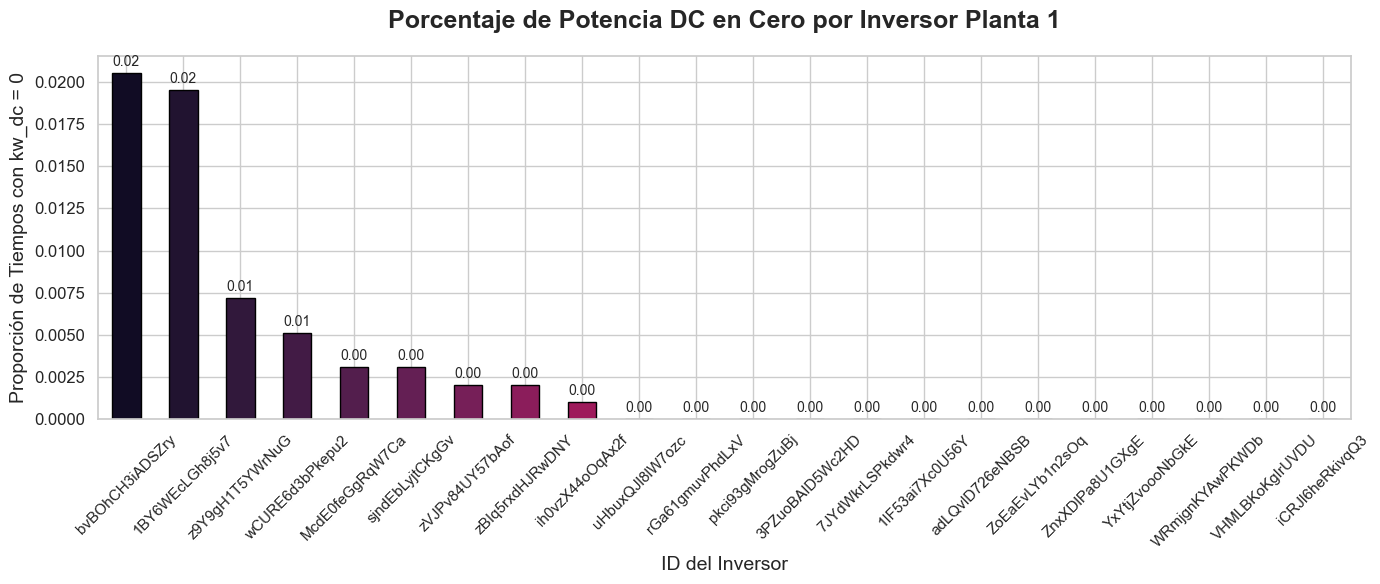

In [112]:
# Estilo general
sns.set(style="whitegrid")

# Datos ordenados
data = temp.groupby('inverter_id')['kw_dc_cero'].mean().sort_values(ascending=False)

# Crear la figura
fig, ax = plt.subplots(figsize=(14, 6))

# Gráfico de barras embellecido
bars = data.plot.bar(
    ax=ax,color=sns.color_palette("rocket", len(data)), edgecolor='black')

# Títulos y etiquetas
ax.set_title('Porcentaje de Potencia DC en Cero por Inversor Planta 1', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('ID del Inversor', fontsize=14)
ax.set_ylabel('Proporción de Tiempos con kw_dc = 0', fontsize=14)

# Ejes y texto
ax.tick_params(axis='x', rotation=45, labelsize=11)
ax.tick_params(axis='y', labelsize=12)

# Agregar etiquetas de valor encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Ajustar diseño
plt.tight_layout()
plt.show()

**CONCLUSIONES**

* Hay varios inverters que han tenido fallos en la generacion de AC, pero son fallos puntuales ya que su magnitud es un 2%.

* Por tanto podemos concluir que la generacion de DC en la planta 1 es correcta, y el problema esta en su transformacion a AC.

# 1.4 Conclusiones Finales

* Existe un problema grave de problema de calidad de datos, de tal importancia que el analisis asume que estan correctos para poder avanzar.
Es necesario revisar en qué parte de la cadena de medición se están generando estos errores, incluyendo los medidores instalados en las plantas.

* La generación en corriente continua (DC) en la Planta 1 es aproximadamente diez veces mayor que en la Planta 2. Esta diferencia, junto con una eficiencia alrededor del 10% en la Planta 1, sugiere que el dato de generación DC podría estar artificialmente inflado. No obstante, y hasta que se realice una verificación, se procederá bajo la suposición de que los datos son correctos.

* El hecho de que la metrica sea exactamente una escala de 10 sugiere que podria haber una diferencia en las unidades de medida.

* Ambas plantas han recibido niveles altos de irradiación solar, sin que se hayan identificado problemas en este aspecto.

* La temperatura ambiente es ligeramente mayor en la PLanta 2, y sus modulos presentan temperaturas superiores a las de la Planta 1, si bien eso no supone una diferencia significativa en el rendimiento.

* En la Planta 1, la generación DC funciona correctamente, los módulos están entregando energía a los inversores.

* En la Planta 2, la generación DC presenta deficiencias: algunos módulos aportan muy poca energía incluso en las horas de máxima irradiación.

* La conversión de DC a corriente alterna (AC) en la Planta 1 no está funcionando adecuadamente. Solo se transforma alrededor del 10% de la energía, aunque de forma constante. Esta baja eficiencia no se debe a la falta de generación DC ni se concentra en inversores específicos, lo que sugiere un problema estructural o, nuevamente, una posible distorsión en los datos de generación DC.

* En la Planta 2, la conversión de DC a AC es eficiente. Excluyendo los periodos sin generación DC, la eficiencia supera el 97%.

# 1.5 Recomendaciones Finales

* Revisar todo el proceso de captacion de datos y su fiabilidad. 
  Objetivo -> Resolver el problema de calidad de datos.

* Realizacion de revisiones de mantenimiento en los modulos de los inverter de la planta 2 , para solucionar/paliar los problema de generacion 0 de DC.

* Realizacion de revisiones de mantenimiento en los modulos de los inverter de la planta 2 